# Set up Environment

In [25]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%load_ext autoreload
%autoreload 2

# Import functions in scripts
import os
import sys
module_path = os.path.abspath(os.path.join('../scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
from proj1_helpers import *
from implementations import *
np.set_printoptions(suppress=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [2]:
targets, traindata, ids = load_csv_data("../data/train.csv",False)
nr_traindata, nr_columns = traindata.shape
print(traindata.shape)

(250000, 30)


In [3]:
with open('../data/train.csv', newline='') as f:
    reader = csv.reader(f)
    headers = next(reader)
headers = np.array(headers[2:])   
print(headers)

['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']


In [83]:
#insert_mean_for_nan(traindata)

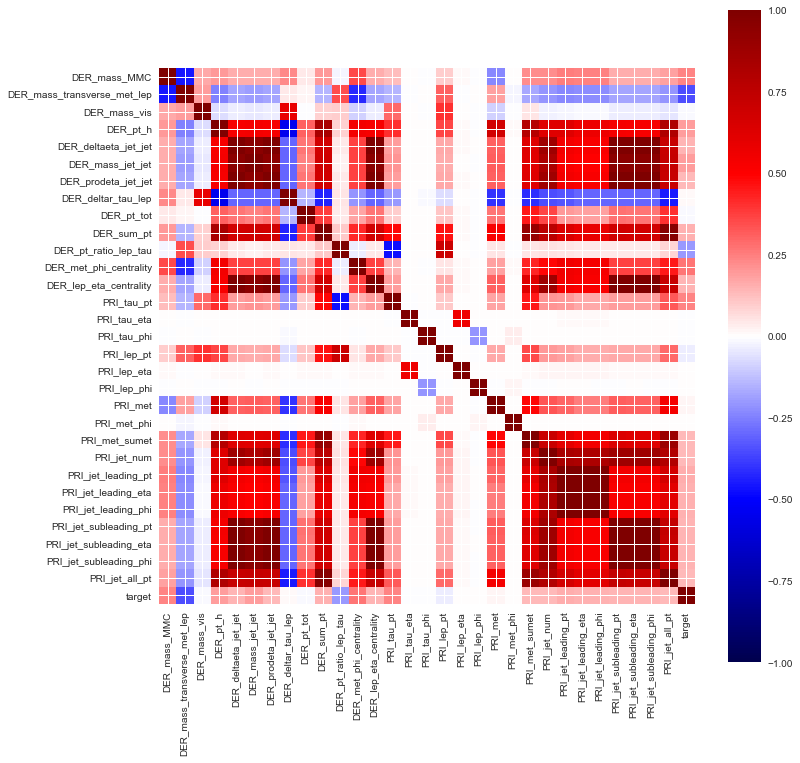

In [4]:
correlation = np.corrcoef(np.c_[traindata, targets], rowvar = False)
plot_corr_matrix(correlation, np.append(headers,'target'))

In [5]:
for ind, corr in enumerate(correlation):
    t = np.sort(corr)
    print(t[:2], t[ -2:])

[-0.45575498 -0.23372357] [ 0.35896271  1.        ]
[-0.45575498 -0.41975734] [ 0.34950361  1.        ]
[-0.09084586 -0.08733037] [ 0.57971162  1.        ]
[-0.53937922 -0.24911593] [ 0.83273307  1.        ]
[-0.29907556 -0.17638605] [ 0.99999839  1.        ]
[-0.30375087 -0.19039202] [ 0.94765181  1.        ]
[-0.29908292 -0.17594178] [ 0.99998967  1.        ]
[-0.53937922 -0.44873696] [ 0.57971162  1.        ]
[-0.14808079 -0.01528743] [ 0.44892531  1.        ]
[-0.43260344 -0.14683668] [ 0.96562839  1.        ]
[-0.47463254 -0.1953979 ] [ 0.70114222  1.        ]
[-0.41975734 -0.2054415 ] [ 0.54861255  1.        ]
[-0.29911468 -0.17626228] [ 0.99999839  1.        ]
[-0.47463254 -0.20203499] [ 0.48584727  1.        ]
[-0.00333015 -0.00266116] [ 0.55708615  1.        ]
[-0.20702619 -0.01122901] [ 0.03292298  1.        ]
[-0.06995667 -0.03194759] [ 0.70114222  1.        ]
[-0.00677707 -0.00392276] [ 0.55708615  1.        ]
[-0.20702619 -0.00570591] [ 0.02315653  1.        ]
[-0.40234491

/home/adam/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


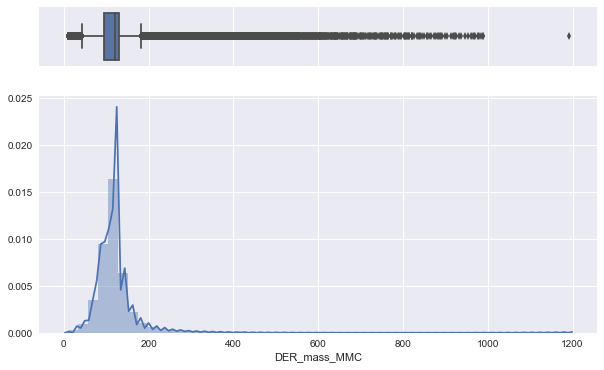

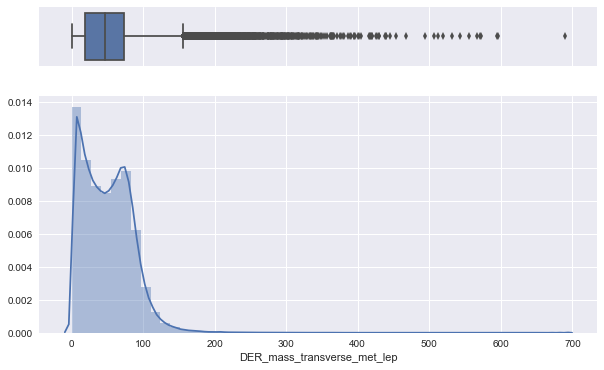

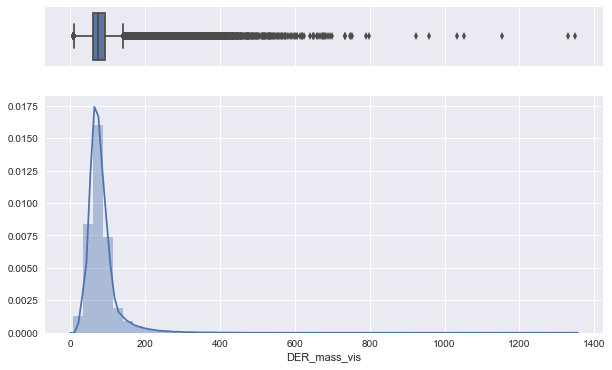

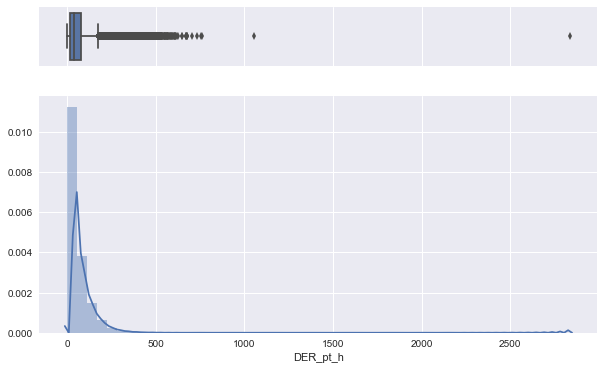

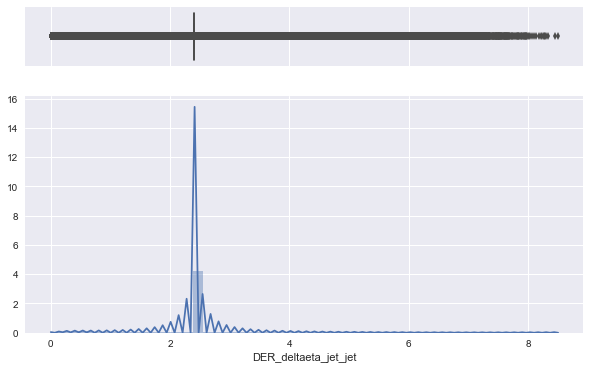

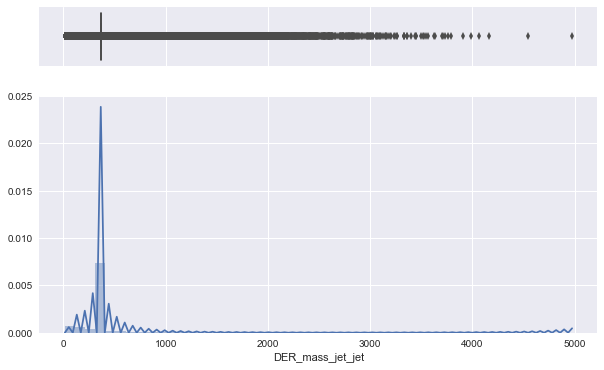

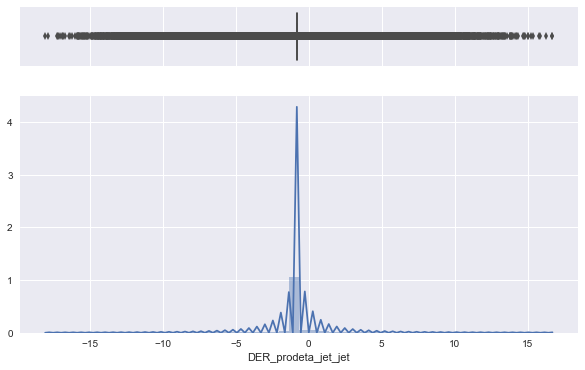

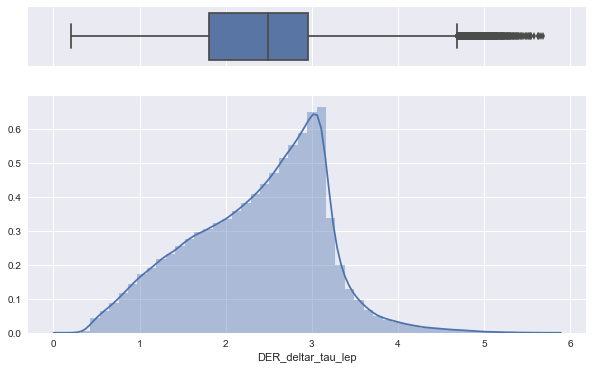

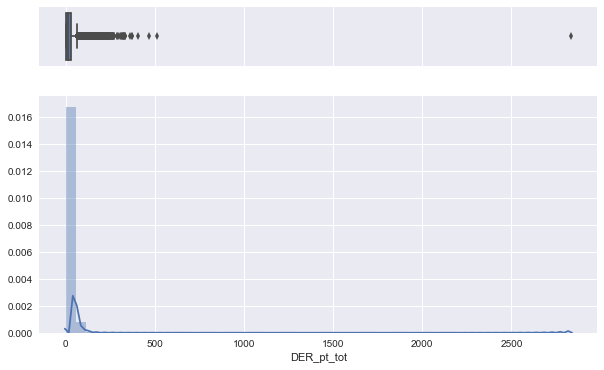

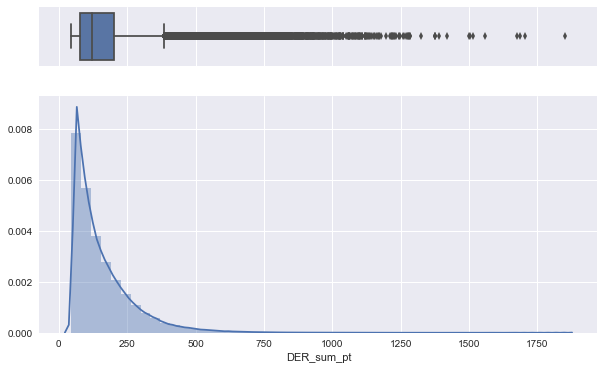

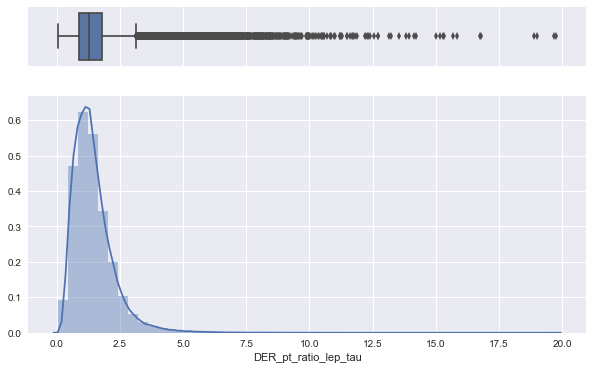

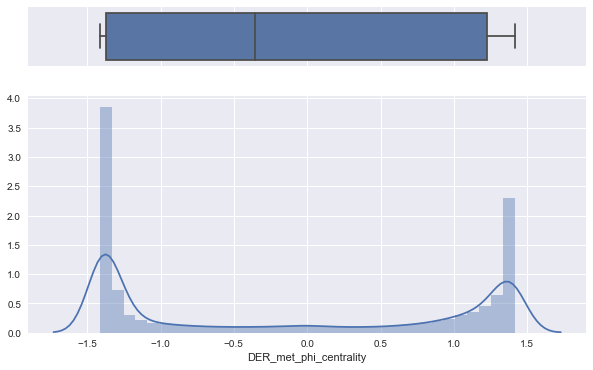

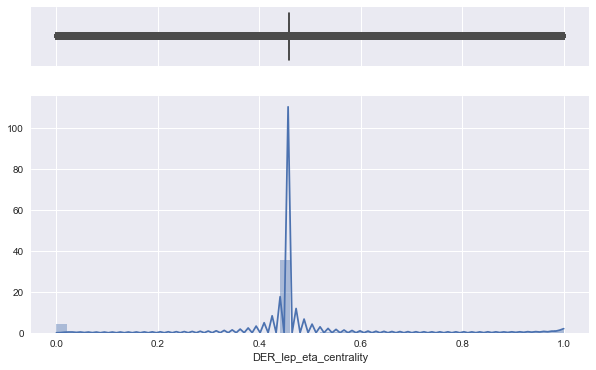

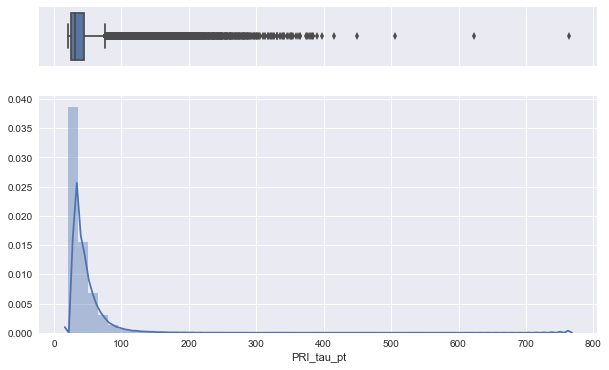

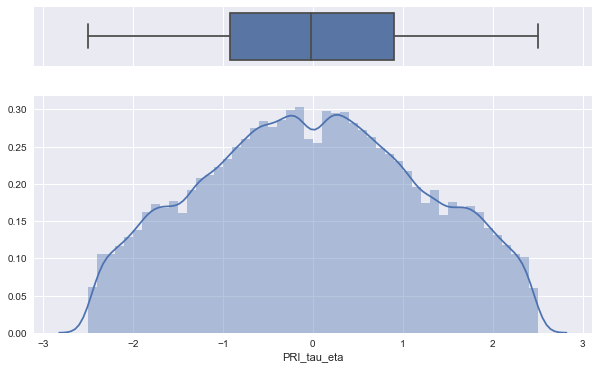

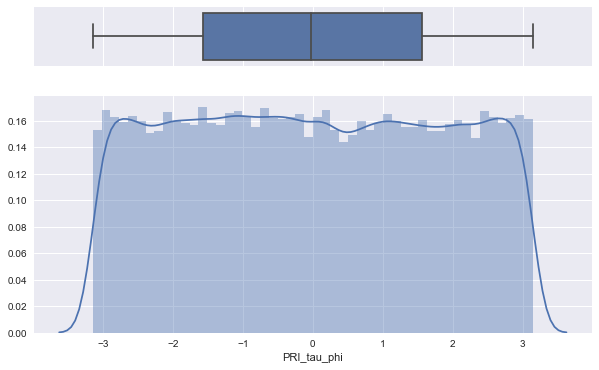

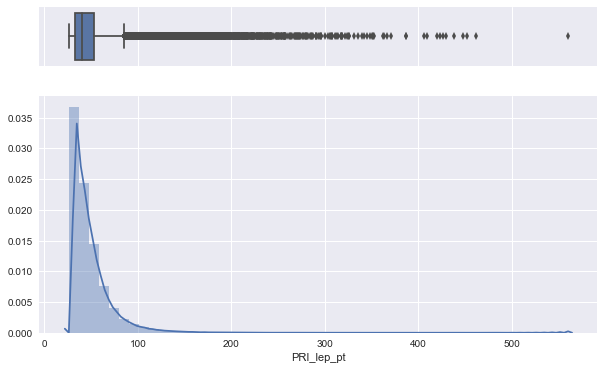

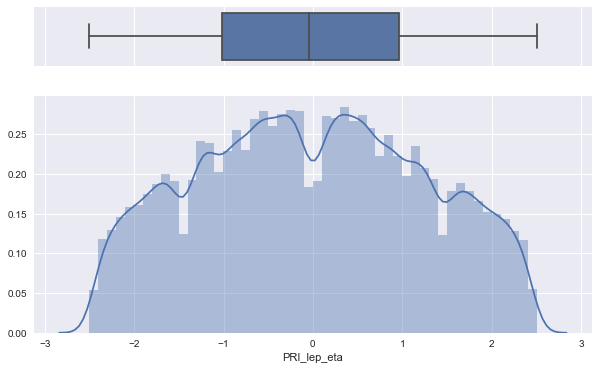

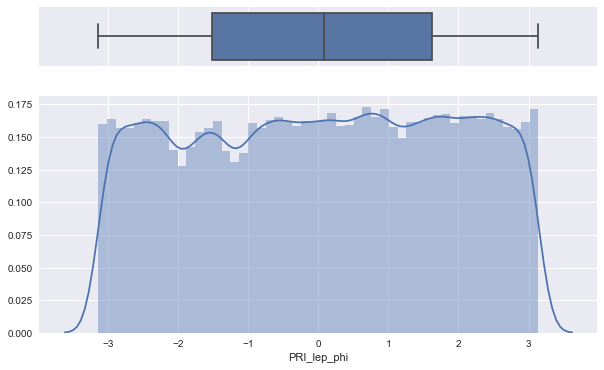

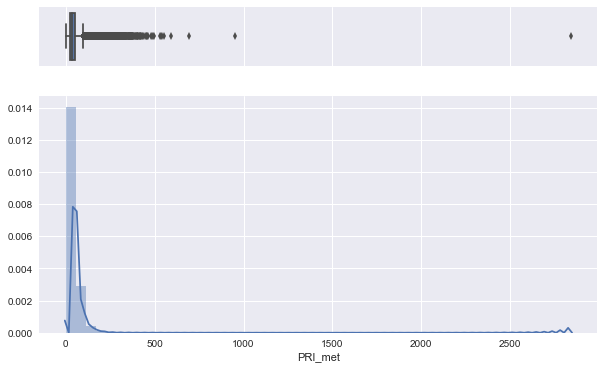

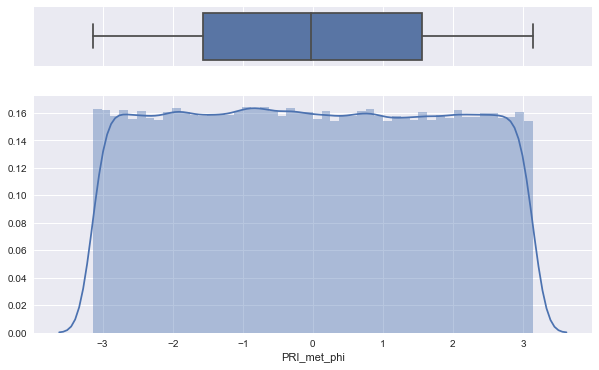

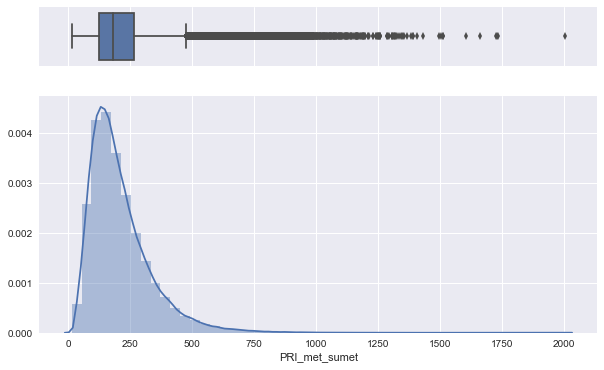

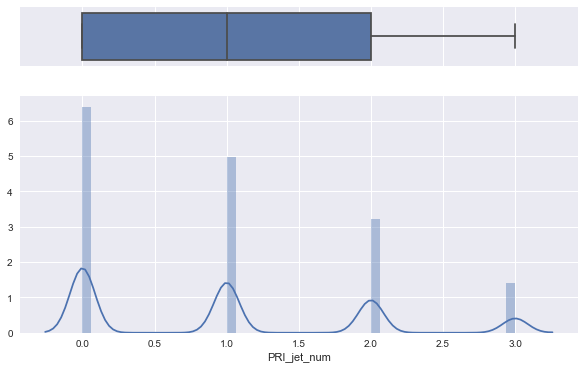

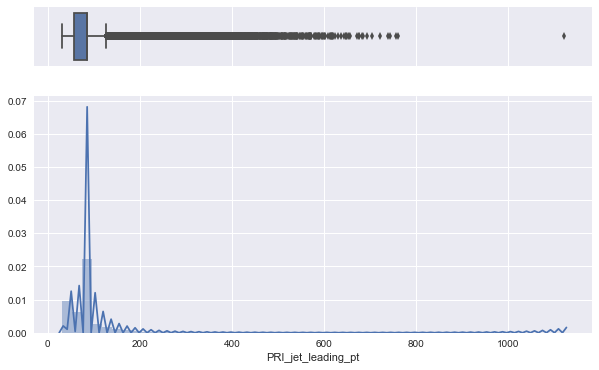

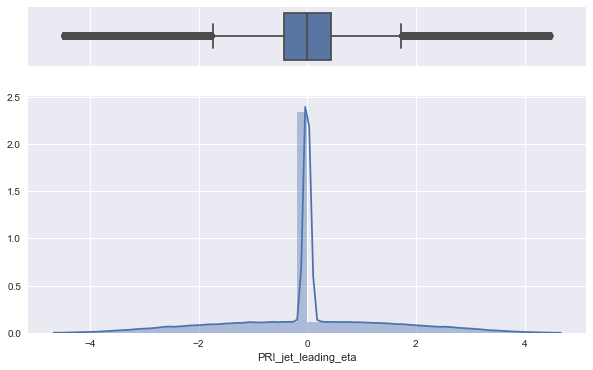

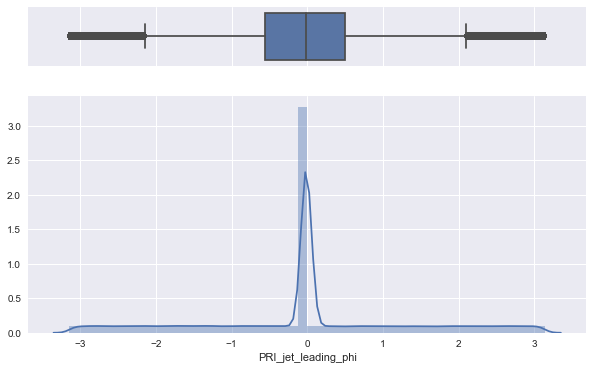

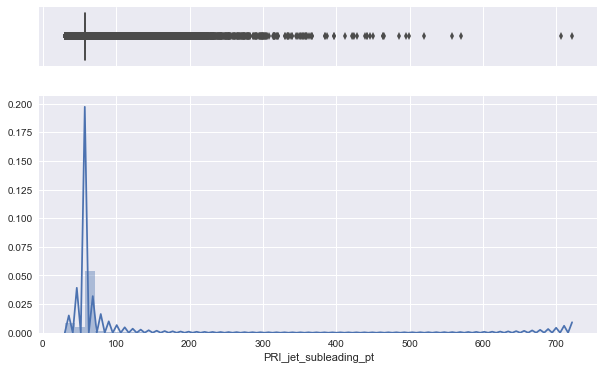

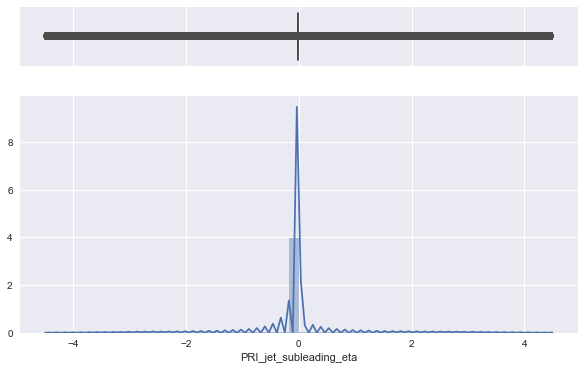

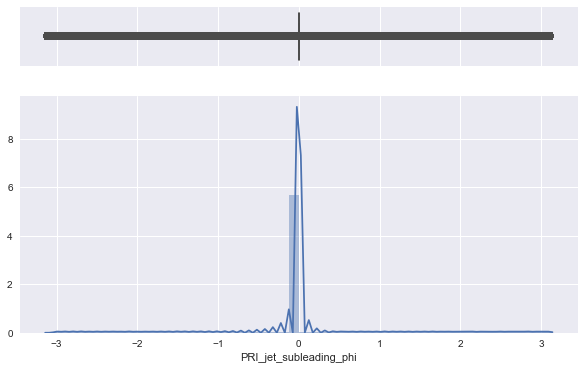

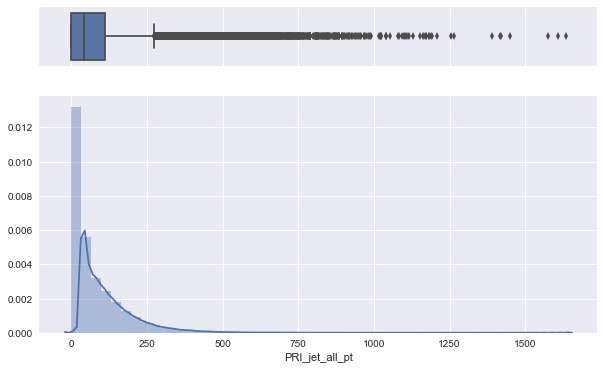

In [13]:
for i, header in enumerate(headers):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .80)}, figsize=(10,6))

    sns.boxplot(traindata[:,i], ax=ax_box)
    sns.distplot(traindata[:,i], ax=ax_hist, label= header)
    
    ax_box.set(yticks=[])
    ax_hist.set(xlabel=header)
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

# Preprocess Data

In [26]:
features = white_cubic_features(traindata,nr_columns,nr_traindata)

In [105]:
features = build_poly(traindata, 3)
features, _, _ = standardize(features)

# Train Model

In [95]:
weights = np.random.random(features.shape[1])

In [87]:
nr_training_iterations = nr_traindata
gamma = 0.000001

In [88]:
for j in range(0,300):
    for i in range(0,nr_training_iterations):
        weights = sgd_step(targets[i], features[i,:], weights, gamma)

In [56]:
losses_sdg, weights_sgd = stochastic_gradient_descent(targets, features, weights, max_iters=10000, batch_size=100, gamma= 0.0005, lambda_ = 0.001)

SGD(0/9999): loss=14.101478246376246, norm of weights=37.76228350540447, gamma=0.0005
SGD(1/9999): loss=13.641814959130079, norm of weights=37.752175834692295, gamma=0.0005
SGD(2/9999): loss=13.615367853159476, norm of weights=37.74713611409179, gamma=0.0005
SGD(3/9999): loss=12.351782553030153, norm of weights=37.72516899644279, gamma=0.0005
SGD(4/9999): loss=12.053648077015094, norm of weights=37.719780157527204, gamma=0.0005
SGD(5/9999): loss=11.237540485488703, norm of weights=37.70577636419392, gamma=0.0005
SGD(6/9999): loss=11.070239491544019, norm of weights=37.70243878784437, gamma=0.0005
SGD(7/9999): loss=11.009252646718812, norm of weights=37.69978846851305, gamma=0.0005
SGD(8/9999): loss=10.99487734267534, norm of weights=37.6982801077649, gamma=0.0005
SGD(9/9999): loss=10.592304346845165, norm of weights=37.69078213071669, gamma=0.0005
SGD(10/9999): loss=10.386674159577002, norm of weights=37.68490635282686, gamma=0.0005
SGD(11/9999): loss=10.359677544473316, norm of weight

SGD(98/9999): loss=1.273165260621609, norm of weights=37.288706948866135, gamma=0.0005
SGD(99/9999): loss=1.271990356866698, norm of weights=37.28652648537492, gamma=0.0005
SGD(100/9999): loss=1.2715187862228468, norm of weights=37.285606348150665, gamma=0.0005
SGD(101/9999): loss=1.2654461411581437, norm of weights=37.282814198422486, gamma=0.0005
SGD(102/9999): loss=1.2609071759887722, norm of weights=37.27627158845171, gamma=0.0005
SGD(103/9999): loss=1.2608671434711325, norm of weights=37.27582235497748, gamma=0.0005
SGD(104/9999): loss=1.2608082406405667, norm of weights=37.275157908712316, gamma=0.0005
SGD(105/9999): loss=1.260846776898212, norm of weights=37.27448993681348, gamma=0.0005
SGD(106/9999): loss=1.2608437773596, norm of weights=37.273929106597535, gamma=0.0005
SGD(107/9999): loss=1.2609517918948459, norm of weights=37.27343814023219, gamma=0.0005
SGD(108/9999): loss=1.2609597818578626, norm of weights=37.27268054132584, gamma=0.0005
SGD(109/9999): loss=1.2594221849309

SGD(205/9999): loss=1.2089767375762444, norm of weights=37.13673045647077, gamma=0.0005
SGD(206/9999): loss=1.2088692359452622, norm of weights=37.13616099106448, gamma=0.0005
SGD(207/9999): loss=1.2085950656620212, norm of weights=37.135355835191795, gamma=0.0005
SGD(208/9999): loss=1.2083797551532092, norm of weights=37.1346645516103, gamma=0.0005
SGD(209/9999): loss=1.2077084492535048, norm of weights=37.133265433769225, gamma=0.0005
SGD(210/9999): loss=1.2075074519180558, norm of weights=37.13254449285789, gamma=0.0005
SGD(211/9999): loss=1.207397898595223, norm of weights=37.13189523958931, gamma=0.0005
SGD(212/9999): loss=1.2025115848946866, norm of weights=37.12293678119019, gamma=0.0005
SGD(213/9999): loss=1.2021045006154254, norm of weights=37.12186550401475, gamma=0.0005
SGD(214/9999): loss=1.2020021516604595, norm of weights=37.12130919850687, gamma=0.0005
SGD(215/9999): loss=1.2019731017601065, norm of weights=37.12085462370149, gamma=0.0005
SGD(216/9999): loss=1.2019268050

SGD(298/9999): loss=1.1429178011325822, norm of weights=36.9599599966831, gamma=0.0005
SGD(299/9999): loss=1.142254600514802, norm of weights=36.95944958227115, gamma=0.0005
SGD(300/9999): loss=1.1415318003680022, norm of weights=36.958685649826535, gamma=0.0005
SGD(301/9999): loss=1.1400635015377203, norm of weights=36.95811712398375, gamma=0.0005
SGD(302/9999): loss=1.139485501238205, norm of weights=36.95722250614874, gamma=0.0005
SGD(303/9999): loss=1.1393835814987934, norm of weights=36.95668563162269, gamma=0.0005
SGD(304/9999): loss=1.138837921688535, norm of weights=36.95546780033071, gamma=0.0005
SGD(305/9999): loss=1.1384150599965173, norm of weights=36.95457306758841, gamma=0.0005
SGD(306/9999): loss=1.138087824720407, norm of weights=36.95360128195324, gamma=0.0005
SGD(307/9999): loss=1.1374951043669443, norm of weights=36.95309965293026, gamma=0.0005
SGD(308/9999): loss=1.1374215975025328, norm of weights=36.952631698951336, gamma=0.0005
SGD(309/9999): loss=1.1370709414888

SGD(404/9999): loss=1.1067744219661932, norm of weights=36.85377877859095, gamma=0.0005
SGD(405/9999): loss=1.1066761961299953, norm of weights=36.85303313140997, gamma=0.0005
SGD(406/9999): loss=1.1067105072879617, norm of weights=36.85253872256807, gamma=0.0005
SGD(407/9999): loss=1.1061620056126416, norm of weights=36.8510606346207, gamma=0.0005
SGD(408/9999): loss=1.1063036136154967, norm of weights=36.850536879153296, gamma=0.0005
SGD(409/9999): loss=1.1062801667746682, norm of weights=36.84993833789481, gamma=0.0005
SGD(410/9999): loss=1.1062535506008282, norm of weights=36.849515293195694, gamma=0.0005
SGD(411/9999): loss=1.1062028908927668, norm of weights=36.84860137668968, gamma=0.0005
SGD(412/9999): loss=1.1057726299534454, norm of weights=36.84731535247982, gamma=0.0005
SGD(413/9999): loss=1.1056185265416203, norm of weights=36.84687168288175, gamma=0.0005
SGD(414/9999): loss=1.1053937003274203, norm of weights=36.84624386849936, gamma=0.0005
SGD(415/9999): loss=1.105086491

SGD(499/9999): loss=1.056257310842046, norm of weights=36.70822212903791, gamma=0.0005
SGD(500/9999): loss=1.0561476286443328, norm of weights=36.70764210001357, gamma=0.0005
SGD(501/9999): loss=1.0560588841549872, norm of weights=36.70714447744868, gamma=0.0005
SGD(502/9999): loss=1.0559314951617644, norm of weights=36.706665231981376, gamma=0.0005
SGD(503/9999): loss=1.0557355487513431, norm of weights=36.70595338340662, gamma=0.0005
SGD(504/9999): loss=1.0556786410453813, norm of weights=36.70541245784625, gamma=0.0005
SGD(505/9999): loss=1.0557002268679208, norm of weights=36.70493130732428, gamma=0.0005
SGD(506/9999): loss=1.0556985291247372, norm of weights=36.704297851729194, gamma=0.0005
SGD(507/9999): loss=1.0555671866556058, norm of weights=36.70354687320814, gamma=0.0005
SGD(508/9999): loss=1.0554340922549046, norm of weights=36.70284109866556, gamma=0.0005
SGD(509/9999): loss=1.055202711906644, norm of weights=36.70182907721059, gamma=0.0005
SGD(510/9999): loss=1.0552317832

SGD(596/9999): loss=1.0133848317923486, norm of weights=36.58307088592099, gamma=0.0005
SGD(597/9999): loss=1.012961622012112, norm of weights=36.582221608917536, gamma=0.0005
SGD(598/9999): loss=1.0127496645364322, norm of weights=36.581272466975534, gamma=0.0005
SGD(599/9999): loss=1.0125659952596096, norm of weights=36.58081783041048, gamma=0.0005
SGD(600/9999): loss=1.0122780617856264, norm of weights=36.57986965423641, gamma=0.0005
SGD(601/9999): loss=1.0121137553728505, norm of weights=36.579529810806875, gamma=0.0005
SGD(602/9999): loss=1.0118070906282295, norm of weights=36.57864740321499, gamma=0.0005
SGD(603/9999): loss=1.011740968867314, norm of weights=36.57803571968819, gamma=0.0005
SGD(604/9999): loss=1.0116077576610032, norm of weights=36.577474753048634, gamma=0.0005
SGD(605/9999): loss=1.011637709764229, norm of weights=36.57678405925476, gamma=0.0005
SGD(606/9999): loss=1.0117582827924865, norm of weights=36.57632717140947, gamma=0.0005
SGD(607/9999): loss=1.011673138

SGD(693/9999): loss=0.9905816459491565, norm of weights=36.49645846199954, gamma=0.0005
SGD(694/9999): loss=0.9906301877615987, norm of weights=36.49571047953255, gamma=0.0005
SGD(695/9999): loss=0.9908491634935942, norm of weights=36.49526849158121, gamma=0.0005
SGD(696/9999): loss=0.9908834398106, norm of weights=36.4944997051884, gamma=0.0005
SGD(697/9999): loss=0.9904105062921846, norm of weights=36.49385820963731, gamma=0.0005
SGD(698/9999): loss=0.9904381864727573, norm of weights=36.493345137919036, gamma=0.0005
SGD(699/9999): loss=0.9907856224753304, norm of weights=36.49281767162066, gamma=0.0005
SGD(700/9999): loss=0.9903669418450622, norm of weights=36.49161868963894, gamma=0.0005
SGD(701/9999): loss=0.9901928070084902, norm of weights=36.49085006712441, gamma=0.0005
SGD(702/9999): loss=0.9903066836694094, norm of weights=36.49005552399071, gamma=0.0005
SGD(703/9999): loss=0.9907433211932939, norm of weights=36.489542681768256, gamma=0.0005
SGD(704/9999): loss=0.989352682921

SGD(798/9999): loss=0.9729718618696072, norm of weights=36.41509884889764, gamma=0.0005
SGD(799/9999): loss=0.9727290209141768, norm of weights=36.414658889468456, gamma=0.0005
SGD(800/9999): loss=0.9727918535486273, norm of weights=36.41425662710031, gamma=0.0005
SGD(801/9999): loss=0.9712507799569485, norm of weights=36.41100860420154, gamma=0.0005
SGD(802/9999): loss=0.9708988142161207, norm of weights=36.410571634431136, gamma=0.0005
SGD(803/9999): loss=0.9709344930246724, norm of weights=36.41023065104993, gamma=0.0005
SGD(804/9999): loss=0.9712664397861803, norm of weights=36.40981490462001, gamma=0.0005
SGD(805/9999): loss=0.9703238820586333, norm of weights=36.40880326016353, gamma=0.0005
SGD(806/9999): loss=0.9702970399883128, norm of weights=36.40825767031539, gamma=0.0005
SGD(807/9999): loss=0.9701918943827869, norm of weights=36.40771242044964, gamma=0.0005
SGD(808/9999): loss=0.9701660905108057, norm of weights=36.4072197148564, gamma=0.0005
SGD(809/9999): loss=0.970031412

SGD(902/9999): loss=0.9521939000509851, norm of weights=36.32854998889924, gamma=0.0005
SGD(903/9999): loss=0.9672796954803881, norm of weights=36.327562280416515, gamma=0.0005
SGD(904/9999): loss=0.9673968479776859, norm of weights=36.32571122238104, gamma=0.0005
SGD(905/9999): loss=0.967328562037343, norm of weights=36.32518736690764, gamma=0.0005
SGD(906/9999): loss=0.9619371732895234, norm of weights=36.32451853717065, gamma=0.0005
SGD(907/9999): loss=0.961206714690082, norm of weights=36.324220289402376, gamma=0.0005
SGD(908/9999): loss=0.9604630626396867, norm of weights=36.32372900722664, gamma=0.0005
SGD(909/9999): loss=0.9602091955447267, norm of weights=36.32314291801789, gamma=0.0005
SGD(910/9999): loss=0.9594947626725827, norm of weights=36.32254309914225, gamma=0.0005
SGD(911/9999): loss=0.9570762801888227, norm of weights=36.32109462958313, gamma=0.0005
SGD(912/9999): loss=0.9560696732433238, norm of weights=36.32047529267007, gamma=0.0005
SGD(913/9999): loss=0.9553121684

SGD(1006/9999): loss=0.9353923791433398, norm of weights=36.244979368282955, gamma=0.0005
SGD(1007/9999): loss=0.9353898607624981, norm of weights=36.24419285487396, gamma=0.0005
SGD(1008/9999): loss=0.9357253593926533, norm of weights=36.24377108987848, gamma=0.0005
SGD(1009/9999): loss=0.9361133480991373, norm of weights=36.243356282033695, gamma=0.0005
SGD(1010/9999): loss=0.9341831438649683, norm of weights=36.23958243100201, gamma=0.0005
SGD(1011/9999): loss=0.9342224198856852, norm of weights=36.23892522546765, gamma=0.0005
SGD(1012/9999): loss=0.9341500316258753, norm of weights=36.238099345130465, gamma=0.0005
SGD(1013/9999): loss=0.9342260651277526, norm of weights=36.23764863220238, gamma=0.0005
SGD(1014/9999): loss=0.9342217430767826, norm of weights=36.23668539863294, gamma=0.0005
SGD(1015/9999): loss=0.9344605755811476, norm of weights=36.23573484051765, gamma=0.0005
SGD(1016/9999): loss=0.9347756540418789, norm of weights=36.23509270135645, gamma=0.0005
SGD(1017/9999): lo

SGD(1106/9999): loss=0.9033271357206902, norm of weights=36.13665002718359, gamma=0.0005
SGD(1107/9999): loss=0.9030391003617393, norm of weights=36.136123712760146, gamma=0.0005
SGD(1108/9999): loss=0.9024314635521878, norm of weights=36.135432506659384, gamma=0.0005
SGD(1109/9999): loss=0.9024004370241554, norm of weights=36.134817061408484, gamma=0.0005
SGD(1110/9999): loss=0.9019101340908333, norm of weights=36.13340468511511, gamma=0.0005
SGD(1111/9999): loss=0.9018456006889325, norm of weights=36.13293734845031, gamma=0.0005
SGD(1112/9999): loss=0.9017658667330988, norm of weights=36.13235176722582, gamma=0.0005
SGD(1113/9999): loss=0.9014481279174683, norm of weights=36.131853075108225, gamma=0.0005
SGD(1114/9999): loss=0.9013184824796541, norm of weights=36.13142626768004, gamma=0.0005
SGD(1115/9999): loss=0.9011604348652177, norm of weights=36.13078036721097, gamma=0.0005
SGD(1116/9999): loss=0.9007550977507925, norm of weights=36.13024775756617, gamma=0.0005
SGD(1117/9999): l

SGD(1209/9999): loss=0.8919727908486725, norm of weights=36.07201271390002, gamma=0.0005
SGD(1210/9999): loss=0.8921673042774305, norm of weights=36.07144838779873, gamma=0.0005
SGD(1211/9999): loss=0.8915324983629124, norm of weights=36.068443185529745, gamma=0.0005
SGD(1212/9999): loss=0.8914296689068598, norm of weights=36.06791023885775, gamma=0.0005
SGD(1213/9999): loss=0.8909670930299542, norm of weights=36.06688585715416, gamma=0.0005
SGD(1214/9999): loss=0.890878750909087, norm of weights=36.066337091219665, gamma=0.0005
SGD(1215/9999): loss=0.8908124636677844, norm of weights=36.06582087984293, gamma=0.0005
SGD(1216/9999): loss=0.8905520137788809, norm of weights=36.064855704558596, gamma=0.0005
SGD(1217/9999): loss=0.8904533780166201, norm of weights=36.064260562494646, gamma=0.0005
SGD(1218/9999): loss=0.89043525029741, norm of weights=36.06388552315804, gamma=0.0005
SGD(1219/9999): loss=0.890325791500822, norm of weights=36.063312138477045, gamma=0.0005
SGD(1220/9999): loss

SGD(1306/9999): loss=0.8737160264091645, norm of weights=35.99040005662791, gamma=0.0005
SGD(1307/9999): loss=0.873665882626436, norm of weights=35.989872566388044, gamma=0.0005
SGD(1308/9999): loss=0.8735662076977706, norm of weights=35.98920270905002, gamma=0.0005
SGD(1309/9999): loss=0.8733884589286862, norm of weights=35.988315606037055, gamma=0.0005
SGD(1310/9999): loss=0.8733793357407662, norm of weights=35.987885266670915, gamma=0.0005
SGD(1311/9999): loss=0.8734040757153176, norm of weights=35.98732389316139, gamma=0.0005
SGD(1312/9999): loss=0.8730613011395693, norm of weights=35.986594600244516, gamma=0.0005
SGD(1313/9999): loss=0.8730319911600871, norm of weights=35.986126632559504, gamma=0.0005
SGD(1314/9999): loss=0.8730280641498582, norm of weights=35.985580472658526, gamma=0.0005
SGD(1315/9999): loss=0.8729794863814743, norm of weights=35.98510428764051, gamma=0.0005
SGD(1316/9999): loss=0.8730967687801311, norm of weights=35.984659257020496, gamma=0.0005
SGD(1317/9999):

SGD(1411/9999): loss=0.8642702066581517, norm of weights=35.91882253339061, gamma=0.0005
SGD(1412/9999): loss=0.8645132269098966, norm of weights=35.91765346654982, gamma=0.0005
SGD(1413/9999): loss=0.8645465818583897, norm of weights=35.91711957523135, gamma=0.0005
SGD(1414/9999): loss=0.8646215672549147, norm of weights=35.91654721847782, gamma=0.0005
SGD(1415/9999): loss=0.8636559249221613, norm of weights=35.915810286716166, gamma=0.0005
SGD(1416/9999): loss=0.8634842080691606, norm of weights=35.914988109006174, gamma=0.0005
SGD(1417/9999): loss=0.8635522312918906, norm of weights=35.91457988989045, gamma=0.0005
SGD(1418/9999): loss=0.8636463498495663, norm of weights=35.91401220703423, gamma=0.0005
SGD(1419/9999): loss=0.863793404026372, norm of weights=35.913532062938934, gamma=0.0005
SGD(1420/9999): loss=0.8636310428907259, norm of weights=35.913018216410904, gamma=0.0005
SGD(1421/9999): loss=0.8623863061175264, norm of weights=35.912369111115076, gamma=0.0005
SGD(1422/9999): l

SGD(1503/9999): loss=0.8530575360756033, norm of weights=35.854454671410984, gamma=0.0005
SGD(1504/9999): loss=0.8530066014617065, norm of weights=35.85386688104161, gamma=0.0005
SGD(1505/9999): loss=0.8526670208878144, norm of weights=35.85272988914185, gamma=0.0005
SGD(1506/9999): loss=0.8519016783933577, norm of weights=35.850869006519915, gamma=0.0005
SGD(1507/9999): loss=0.8519940041509497, norm of weights=35.85043265503836, gamma=0.0005
SGD(1508/9999): loss=0.852027510970199, norm of weights=35.84995393960771, gamma=0.0005
SGD(1509/9999): loss=0.8518456967948366, norm of weights=35.849365901619265, gamma=0.0005
SGD(1510/9999): loss=0.8517800956464251, norm of weights=35.84880067486161, gamma=0.0005
SGD(1511/9999): loss=0.8516739996821925, norm of weights=35.8481082943438, gamma=0.0005
SGD(1512/9999): loss=0.8516610718029718, norm of weights=35.84768993203826, gamma=0.0005
SGD(1513/9999): loss=0.8514731703572174, norm of weights=35.84705477977484, gamma=0.0005
SGD(1514/9999): loss

SGD(1602/9999): loss=0.8500459392669943, norm of weights=35.77519143186085, gamma=0.0005
SGD(1603/9999): loss=0.8497691754887458, norm of weights=35.774741785796905, gamma=0.0005
SGD(1604/9999): loss=0.8473590068033275, norm of weights=35.77408845354779, gamma=0.0005
SGD(1605/9999): loss=0.8468770956463169, norm of weights=35.773706825273194, gamma=0.0005
SGD(1606/9999): loss=0.8393083611685901, norm of weights=35.77330025732094, gamma=0.0005
SGD(1607/9999): loss=0.8388434885999141, norm of weights=35.77278865704487, gamma=0.0005
SGD(1608/9999): loss=0.8383952832508108, norm of weights=35.77223652483853, gamma=0.0005
SGD(1609/9999): loss=0.8382283560773425, norm of weights=35.771736340567756, gamma=0.0005
SGD(1610/9999): loss=0.8380729396541037, norm of weights=35.77118381311426, gamma=0.0005
SGD(1611/9999): loss=0.8377506723602872, norm of weights=35.770646051672294, gamma=0.0005
SGD(1612/9999): loss=0.837574585708912, norm of weights=35.76998261126973, gamma=0.0005
SGD(1613/9999): lo

SGD(1701/9999): loss=0.8264247731100647, norm of weights=35.70648953444126, gamma=0.0005
SGD(1702/9999): loss=0.8259076788441234, norm of weights=35.70479081195115, gamma=0.0005
SGD(1703/9999): loss=0.8254804377424102, norm of weights=35.704135095928294, gamma=0.0005
SGD(1704/9999): loss=0.8243955410652637, norm of weights=35.701707674770866, gamma=0.0005
SGD(1705/9999): loss=0.8242408666782269, norm of weights=35.7012690506852, gamma=0.0005
SGD(1706/9999): loss=0.8241761057796939, norm of weights=35.700821977510294, gamma=0.0005
SGD(1707/9999): loss=0.8240387291836266, norm of weights=35.700185945133825, gamma=0.0005
SGD(1708/9999): loss=0.8240293923140443, norm of weights=35.69970161743552, gamma=0.0005
SGD(1709/9999): loss=0.8239866170712532, norm of weights=35.69918560985765, gamma=0.0005
SGD(1710/9999): loss=0.823956935967756, norm of weights=35.69853253556213, gamma=0.0005
SGD(1711/9999): loss=0.8238353229434078, norm of weights=35.69785227346259, gamma=0.0005
SGD(1712/9999): los

SGD(1802/9999): loss=0.8211162427435609, norm of weights=35.63728136850398, gamma=0.0005
SGD(1803/9999): loss=0.8216476084903725, norm of weights=35.63522496514153, gamma=0.0005
SGD(1804/9999): loss=0.8189196160353583, norm of weights=35.63432340367921, gamma=0.0005
SGD(1805/9999): loss=0.81854310287487, norm of weights=35.63388302016721, gamma=0.0005
SGD(1806/9999): loss=0.8180574909834735, norm of weights=35.633354564659285, gamma=0.0005
SGD(1807/9999): loss=0.8194049632713472, norm of weights=35.63278570251525, gamma=0.0005
SGD(1808/9999): loss=0.8191431478798378, norm of weights=35.63222077499306, gamma=0.0005
SGD(1809/9999): loss=0.8180190552394514, norm of weights=35.63145360570166, gamma=0.0005
SGD(1810/9999): loss=0.8177142375408574, norm of weights=35.63099090713631, gamma=0.0005
SGD(1811/9999): loss=0.8175165751518442, norm of weights=35.63050083952291, gamma=0.0005
SGD(1812/9999): loss=0.8171935310496169, norm of weights=35.63007050064634, gamma=0.0005
SGD(1813/9999): loss=0

SGD(1900/9999): loss=0.8158859918581143, norm of weights=35.579516862254835, gamma=0.0005
SGD(1901/9999): loss=0.8160656381180824, norm of weights=35.5791003510795, gamma=0.0005
SGD(1902/9999): loss=0.8162410413039627, norm of weights=35.57870576065814, gamma=0.0005
SGD(1903/9999): loss=0.816648738373166, norm of weights=35.57817018803411, gamma=0.0005
SGD(1904/9999): loss=0.8171236556879697, norm of weights=35.57779354759155, gamma=0.0005
SGD(1905/9999): loss=0.8176986258268243, norm of weights=35.57712005913361, gamma=0.0005
SGD(1906/9999): loss=0.8179525137367183, norm of weights=35.57674168982135, gamma=0.0005
SGD(1907/9999): loss=0.8185828499690745, norm of weights=35.57621914901015, gamma=0.0005
SGD(1908/9999): loss=0.8189939375845214, norm of weights=35.575280056248616, gamma=0.0005
SGD(1909/9999): loss=0.8192967858579706, norm of weights=35.57450798097083, gamma=0.0005
SGD(1910/9999): loss=0.8195592401998395, norm of weights=35.57408523959249, gamma=0.0005
SGD(1911/9999): loss=

SGD(1995/9999): loss=0.798187646278518, norm of weights=35.509237057873094, gamma=0.0005
SGD(1996/9999): loss=0.7952955141830498, norm of weights=35.502832527811485, gamma=0.0005
SGD(1997/9999): loss=0.7952854613377374, norm of weights=35.50224124685183, gamma=0.0005
SGD(1998/9999): loss=0.795326553799191, norm of weights=35.50157378006098, gamma=0.0005
SGD(1999/9999): loss=0.7951558372536174, norm of weights=35.500928516477394, gamma=0.0005
SGD(2000/9999): loss=0.7951700750619991, norm of weights=35.50057448061698, gamma=0.0005
SGD(2001/9999): loss=0.7951449336906914, norm of weights=35.50001638292932, gamma=0.0005
SGD(2002/9999): loss=0.7951537547729852, norm of weights=35.499424818184224, gamma=0.0005
SGD(2003/9999): loss=0.7952085992832004, norm of weights=35.49898040320434, gamma=0.0005
SGD(2004/9999): loss=0.7953179418167307, norm of weights=35.498364658242245, gamma=0.0005
SGD(2005/9999): loss=0.7950022409747172, norm of weights=35.49778895190383, gamma=0.0005
SGD(2006/9999): lo

SGD(2097/9999): loss=0.7841594031874477, norm of weights=35.42959786567175, gamma=0.0005
SGD(2098/9999): loss=0.7840127776363582, norm of weights=35.42883550054554, gamma=0.0005
SGD(2099/9999): loss=0.7839858320169779, norm of weights=35.42822156014452, gamma=0.0005
SGD(2100/9999): loss=0.7839896276093733, norm of weights=35.42781691869834, gamma=0.0005
SGD(2101/9999): loss=0.7839715027062318, norm of weights=35.427227912106744, gamma=0.0005
SGD(2102/9999): loss=0.7840435334148362, norm of weights=35.426775583930564, gamma=0.0005
SGD(2103/9999): loss=0.7841301512018569, norm of weights=35.42618219573483, gamma=0.0005
SGD(2104/9999): loss=0.7842109727396777, norm of weights=35.42576646716522, gamma=0.0005
SGD(2105/9999): loss=0.7840320940171982, norm of weights=35.42516953171696, gamma=0.0005
SGD(2106/9999): loss=0.7839290561018573, norm of weights=35.424575359043416, gamma=0.0005
SGD(2107/9999): loss=0.783937706073643, norm of weights=35.424166422966664, gamma=0.0005
SGD(2108/9999): lo

SGD(2198/9999): loss=0.779371437044601, norm of weights=35.36702568751741, gamma=0.0005
SGD(2199/9999): loss=0.7792505509635355, norm of weights=35.366136555962214, gamma=0.0005
SGD(2200/9999): loss=0.8024214942203948, norm of weights=35.365158501486874, gamma=0.0005
SGD(2201/9999): loss=0.8093417853652257, norm of weights=35.36364881648524, gamma=0.0005
SGD(2202/9999): loss=0.8076491758293748, norm of weights=35.363180824150945, gamma=0.0005
SGD(2203/9999): loss=0.8069769507962563, norm of weights=35.36274351445703, gamma=0.0005
SGD(2204/9999): loss=0.8028808410605308, norm of weights=35.362240301109615, gamma=0.0005
SGD(2205/9999): loss=0.8026901379577688, norm of weights=35.36183468571286, gamma=0.0005
SGD(2206/9999): loss=0.7976717457700007, norm of weights=35.36121434512979, gamma=0.0005
SGD(2207/9999): loss=0.7974141235233214, norm of weights=35.36074835736761, gamma=0.0005
SGD(2208/9999): loss=0.7926051065661742, norm of weights=35.36015856210656, gamma=0.0005
SGD(2209/9999): lo

SGD(2299/9999): loss=0.7722380311811774, norm of weights=35.301122962193375, gamma=0.0005
SGD(2300/9999): loss=0.7725362208047316, norm of weights=35.3006409816585, gamma=0.0005
SGD(2301/9999): loss=0.7727781935024168, norm of weights=35.30011463599097, gamma=0.0005
SGD(2302/9999): loss=0.7727450255703922, norm of weights=35.29898348397629, gamma=0.0005
SGD(2303/9999): loss=0.7730046065938698, norm of weights=35.29856081649391, gamma=0.0005
SGD(2304/9999): loss=0.7736320118493091, norm of weights=35.298128608143664, gamma=0.0005
SGD(2305/9999): loss=0.7740351673197227, norm of weights=35.29772426894633, gamma=0.0005
SGD(2306/9999): loss=0.7744347963628317, norm of weights=35.29733214556045, gamma=0.0005
SGD(2307/9999): loss=0.7748122651569468, norm of weights=35.296723300546155, gamma=0.0005
SGD(2308/9999): loss=0.7753096132367232, norm of weights=35.296334835114465, gamma=0.0005
SGD(2309/9999): loss=0.7756816506144121, norm of weights=35.29581577503778, gamma=0.0005
SGD(2310/9999): lo

SGD(2400/9999): loss=0.7645677629138259, norm of weights=35.23227787503946, gamma=0.0005
SGD(2401/9999): loss=0.7645663507725066, norm of weights=35.231787851699124, gamma=0.0005
SGD(2402/9999): loss=0.7647806196292604, norm of weights=35.23104127851836, gamma=0.0005
SGD(2403/9999): loss=0.7648062451710337, norm of weights=35.23046159964659, gamma=0.0005
SGD(2404/9999): loss=0.765018379762912, norm of weights=35.229954922171316, gamma=0.0005
SGD(2405/9999): loss=0.765449258046141, norm of weights=35.229505472545384, gamma=0.0005
SGD(2406/9999): loss=0.7659161243780838, norm of weights=35.229009206301846, gamma=0.0005
SGD(2407/9999): loss=0.7659742877371435, norm of weights=35.22863179432865, gamma=0.0005
SGD(2408/9999): loss=0.7658752643541232, norm of weights=35.22819253033526, gamma=0.0005
SGD(2409/9999): loss=0.7661057466004716, norm of weights=35.22768908541373, gamma=0.0005
SGD(2410/9999): loss=0.7666137039545337, norm of weights=35.22724977276674, gamma=0.0005
SGD(2411/9999): los

SGD(2500/9999): loss=0.7594124140737427, norm of weights=35.17237911777626, gamma=0.0005
SGD(2501/9999): loss=0.7598229714689347, norm of weights=35.17169987533207, gamma=0.0005
SGD(2502/9999): loss=0.7601397377106996, norm of weights=35.17115067774316, gamma=0.0005
SGD(2503/9999): loss=0.7601035001783758, norm of weights=35.17062298318686, gamma=0.0005
SGD(2504/9999): loss=0.7604339892128361, norm of weights=35.17011877892555, gamma=0.0005
SGD(2505/9999): loss=0.755996186567694, norm of weights=35.16935567939493, gamma=0.0005
SGD(2506/9999): loss=0.7560321800392993, norm of weights=35.16868813038081, gamma=0.0005
SGD(2507/9999): loss=0.7560919759135083, norm of weights=35.1682819857359, gamma=0.0005
SGD(2508/9999): loss=0.7560122568194758, norm of weights=35.16743117777538, gamma=0.0005
SGD(2509/9999): loss=0.7560981485057819, norm of weights=35.1668673842873, gamma=0.0005
SGD(2510/9999): loss=0.756070068311071, norm of weights=35.166427513823514, gamma=0.0005
SGD(2511/9999): loss=0.7

SGD(2599/9999): loss=0.752451155836336, norm of weights=35.11580636106116, gamma=0.0005
SGD(2600/9999): loss=0.7524607517230478, norm of weights=35.11529884025724, gamma=0.0005
SGD(2601/9999): loss=0.7524253095776717, norm of weights=35.114766017628256, gamma=0.0005
SGD(2602/9999): loss=0.7520222133537187, norm of weights=35.113695481745, gamma=0.0005
SGD(2603/9999): loss=0.7519731674462138, norm of weights=35.113065500883145, gamma=0.0005
SGD(2604/9999): loss=0.7519625987751231, norm of weights=35.112544897868716, gamma=0.0005
SGD(2605/9999): loss=0.7519663027645913, norm of weights=35.112000170908416, gamma=0.0005
SGD(2606/9999): loss=0.7519382665511332, norm of weights=35.11139346019242, gamma=0.0005
SGD(2607/9999): loss=0.7517539470205833, norm of weights=35.1104816748844, gamma=0.0005
SGD(2608/9999): loss=0.7517827310720503, norm of weights=35.109950241233236, gamma=0.0005
SGD(2609/9999): loss=0.7517107367733514, norm of weights=35.109282771886946, gamma=0.0005
SGD(2610/9999): los

SGD(2692/9999): loss=0.7470568062168278, norm of weights=35.04901975488153, gamma=0.0005
SGD(2693/9999): loss=0.7476045268931412, norm of weights=35.04848930285848, gamma=0.0005
SGD(2694/9999): loss=0.7449712874751764, norm of weights=35.04445251666985, gamma=0.0005
SGD(2695/9999): loss=0.7451452376285207, norm of weights=35.043853791016275, gamma=0.0005
SGD(2696/9999): loss=0.7455033062401565, norm of weights=35.043421364188674, gamma=0.0005
SGD(2697/9999): loss=0.745332697633724, norm of weights=35.042801222108935, gamma=0.0005
SGD(2698/9999): loss=0.7455951467711119, norm of weights=35.04230960064595, gamma=0.0005
SGD(2699/9999): loss=0.7458360644834552, norm of weights=35.04139732243802, gamma=0.0005
SGD(2700/9999): loss=0.7461665407699475, norm of weights=35.041133310635914, gamma=0.0005
SGD(2701/9999): loss=0.7456886732277954, norm of weights=35.04028994733487, gamma=0.0005
SGD(2702/9999): loss=0.742815859299257, norm of weights=35.03956044048749, gamma=0.0005
SGD(2703/9999): los

SGD(2785/9999): loss=0.7472033127936405, norm of weights=34.99073678075122, gamma=0.0005
SGD(2786/9999): loss=0.7460055601896443, norm of weights=34.990243124761335, gamma=0.0005
SGD(2787/9999): loss=0.7458484217094998, norm of weights=34.98966135920516, gamma=0.0005
SGD(2788/9999): loss=0.7450723736423888, norm of weights=34.98921014857754, gamma=0.0005
SGD(2789/9999): loss=0.7436186552315945, norm of weights=34.98868187533842, gamma=0.0005
SGD(2790/9999): loss=0.7432391315731502, norm of weights=34.988145961499285, gamma=0.0005
SGD(2791/9999): loss=0.7450409173364254, norm of weights=34.987724497444056, gamma=0.0005
SGD(2792/9999): loss=0.744260374375701, norm of weights=34.98733017077794, gamma=0.0005
SGD(2793/9999): loss=0.7441163780585053, norm of weights=34.98681842212814, gamma=0.0005
SGD(2794/9999): loss=0.7439144069363037, norm of weights=34.98639255224572, gamma=0.0005
SGD(2795/9999): loss=0.742906804188499, norm of weights=34.98584455394402, gamma=0.0005
SGD(2796/9999): loss

SGD(2889/9999): loss=0.7422492245385863, norm of weights=34.93373849468561, gamma=0.0005
SGD(2890/9999): loss=0.7414237899372552, norm of weights=34.933172237476285, gamma=0.0005
SGD(2891/9999): loss=0.7408920250436237, norm of weights=34.932713512286, gamma=0.0005
SGD(2892/9999): loss=0.7402498390148169, norm of weights=34.93215107567429, gamma=0.0005
SGD(2893/9999): loss=0.739767590922951, norm of weights=34.93168307458845, gamma=0.0005
SGD(2894/9999): loss=0.7394461624923309, norm of weights=34.931262201023074, gamma=0.0005
SGD(2895/9999): loss=0.7392117551702929, norm of weights=34.93068131800312, gamma=0.0005
SGD(2896/9999): loss=0.7390368466927036, norm of weights=34.92998280562192, gamma=0.0005
SGD(2897/9999): loss=0.7381220315881225, norm of weights=34.9296229507167, gamma=0.0005
SGD(2898/9999): loss=0.7394065051924668, norm of weights=34.929262089210155, gamma=0.0005
SGD(2899/9999): loss=0.7390220757624301, norm of weights=34.92879404141246, gamma=0.0005
SGD(2900/9999): loss=0

SGD(2984/9999): loss=0.6338599249671321, norm of weights=34.57271107335916, gamma=0.0005
SGD(2985/9999): loss=0.6328257477983706, norm of weights=34.572112583473974, gamma=0.0005
SGD(2986/9999): loss=0.6277477983389667, norm of weights=34.5716205910003, gamma=0.0005
SGD(2987/9999): loss=0.6226327463802791, norm of weights=34.57113303205752, gamma=0.0005
SGD(2988/9999): loss=0.6221050111912743, norm of weights=34.57065007495696, gamma=0.0005
SGD(2989/9999): loss=0.621933137836101, norm of weights=34.57020697154324, gamma=0.0005
SGD(2990/9999): loss=0.6219310159346615, norm of weights=34.56952235282377, gamma=0.0005
SGD(2991/9999): loss=0.6218115434409709, norm of weights=34.56906838078318, gamma=0.0005
SGD(2992/9999): loss=0.6212201512274144, norm of weights=34.568600984525105, gamma=0.0005
SGD(2993/9999): loss=0.6209861110062839, norm of weights=34.568233212198535, gamma=0.0005
SGD(2994/9999): loss=0.6203114978217436, norm of weights=34.567695025796574, gamma=0.0005
SGD(2995/9999): los

SGD(3079/9999): loss=0.6170370305198388, norm of weights=34.52178740883272, gamma=0.0005
SGD(3080/9999): loss=0.6171923304696022, norm of weights=34.521388975324165, gamma=0.0005
SGD(3081/9999): loss=0.6169121584985641, norm of weights=34.520838952141645, gamma=0.0005
SGD(3082/9999): loss=0.6167927595108023, norm of weights=34.52025290230776, gamma=0.0005
SGD(3083/9999): loss=0.6168361191966375, norm of weights=34.51977158846774, gamma=0.0005
SGD(3084/9999): loss=0.6166467450845451, norm of weights=34.518993269097564, gamma=0.0005
SGD(3085/9999): loss=0.616625195955493, norm of weights=34.51855916059411, gamma=0.0005
SGD(3086/9999): loss=0.6166070395763428, norm of weights=34.5179739080615, gamma=0.0005
SGD(3087/9999): loss=0.6166096129888006, norm of weights=34.51758150579452, gamma=0.0005
SGD(3088/9999): loss=0.6165696565319407, norm of weights=34.51689741523373, gamma=0.0005
SGD(3089/9999): loss=0.6165732211823173, norm of weights=34.516456046645466, gamma=0.0005
SGD(3090/9999): los

SGD(3182/9999): loss=0.6132850536737374, norm of weights=34.457365962213416, gamma=0.0005
SGD(3183/9999): loss=0.6135319016637023, norm of weights=34.45673536479867, gamma=0.0005
SGD(3184/9999): loss=0.6135543887260412, norm of weights=34.45625345356767, gamma=0.0005
SGD(3185/9999): loss=0.6134525972556536, norm of weights=34.45562834525873, gamma=0.0005
SGD(3186/9999): loss=0.6137117446792854, norm of weights=34.45517598491182, gamma=0.0005
SGD(3187/9999): loss=0.613898287259357, norm of weights=34.45459790018857, gamma=0.0005
SGD(3188/9999): loss=0.6141323835192137, norm of weights=34.454168640748385, gamma=0.0005
SGD(3189/9999): loss=0.614093231803257, norm of weights=34.453825016594244, gamma=0.0005
SGD(3190/9999): loss=0.614402705748522, norm of weights=34.45315756930918, gamma=0.0005
SGD(3191/9999): loss=0.6137926997257585, norm of weights=34.452598399255905, gamma=0.0005
SGD(3192/9999): loss=0.6136872087195269, norm of weights=34.45205893477829, gamma=0.0005
SGD(3193/9999): loss

SGD(3276/9999): loss=0.6100874613469888, norm of weights=34.40596949138615, gamma=0.0005
SGD(3277/9999): loss=0.610105313172661, norm of weights=34.40541524909163, gamma=0.0005
SGD(3278/9999): loss=0.6101199436006172, norm of weights=34.404990732898106, gamma=0.0005
SGD(3279/9999): loss=0.6100265087770811, norm of weights=34.404219257691835, gamma=0.0005
SGD(3280/9999): loss=0.6100696708948923, norm of weights=34.403844453303755, gamma=0.0005
SGD(3281/9999): loss=0.6101234184416404, norm of weights=34.40324924724683, gamma=0.0005
SGD(3282/9999): loss=0.6098604198645833, norm of weights=34.401942193616414, gamma=0.0005
SGD(3283/9999): loss=0.6099573618354974, norm of weights=34.40148292002085, gamma=0.0005
SGD(3284/9999): loss=0.6099997981515425, norm of weights=34.401076363980664, gamma=0.0005
SGD(3285/9999): loss=0.6100201284020593, norm of weights=34.40061583608532, gamma=0.0005
SGD(3286/9999): loss=0.6100523512078658, norm of weights=34.400048787530885, gamma=0.0005
SGD(3287/9999): 

SGD(3376/9999): loss=0.6071066840574313, norm of weights=34.34581036850706, gamma=0.0005
SGD(3377/9999): loss=0.6072476075308149, norm of weights=34.34508966864212, gamma=0.0005
SGD(3378/9999): loss=0.6070612943261232, norm of weights=34.34461632292023, gamma=0.0005
SGD(3379/9999): loss=0.6068860125711898, norm of weights=34.34420159644422, gamma=0.0005
SGD(3380/9999): loss=0.6067459133721769, norm of weights=34.343715600670805, gamma=0.0005
SGD(3381/9999): loss=0.6066982422045589, norm of weights=34.34337771435112, gamma=0.0005
SGD(3382/9999): loss=0.609769929025895, norm of weights=34.34290635653999, gamma=0.0005
SGD(3383/9999): loss=0.6095662495358682, norm of weights=34.342448322394326, gamma=0.0005
SGD(3384/9999): loss=0.6087992401230349, norm of weights=34.341905799728906, gamma=0.0005
SGD(3385/9999): loss=0.6085576089903161, norm of weights=34.3414276705884, gamma=0.0005
SGD(3386/9999): loss=0.6077279106538743, norm of weights=34.340977184895046, gamma=0.0005
SGD(3387/9999): los

SGD(3472/9999): loss=0.605708067908071, norm of weights=34.29801673717702, gamma=0.0005
SGD(3473/9999): loss=0.6056594066961722, norm of weights=34.29753560934528, gamma=0.0005
SGD(3474/9999): loss=0.6056398190417911, norm of weights=34.29699112025709, gamma=0.0005
SGD(3475/9999): loss=0.6056694663614178, norm of weights=34.29655672437024, gamma=0.0005
SGD(3476/9999): loss=0.6056808010002025, norm of weights=34.29607240770619, gamma=0.0005
SGD(3477/9999): loss=0.6056848351939662, norm of weights=34.29553633534809, gamma=0.0005
SGD(3478/9999): loss=0.6059061622878935, norm of weights=34.2950928229655, gamma=0.0005
SGD(3479/9999): loss=0.606026633168459, norm of weights=34.2947232352275, gamma=0.0005
SGD(3480/9999): loss=0.6061919338577896, norm of weights=34.29425769665581, gamma=0.0005
SGD(3481/9999): loss=0.6064485479520656, norm of weights=34.29381274134557, gamma=0.0005
SGD(3482/9999): loss=0.6064634362362858, norm of weights=34.29329514852063, gamma=0.0005
SGD(3483/9999): loss=0.60

SGD(3565/9999): loss=0.6046287661543717, norm of weights=34.251638258807276, gamma=0.0005
SGD(3566/9999): loss=0.6045942153152802, norm of weights=34.25080903548174, gamma=0.0005
SGD(3567/9999): loss=0.6045745088339389, norm of weights=34.25019152471892, gamma=0.0005
SGD(3568/9999): loss=0.6045693204341921, norm of weights=34.24968023759816, gamma=0.0005
SGD(3569/9999): loss=0.6045799115220383, norm of weights=34.249194378949376, gamma=0.0005
SGD(3570/9999): loss=0.6045911991525362, norm of weights=34.248783635323335, gamma=0.0005
SGD(3571/9999): loss=0.6046469388026895, norm of weights=34.24827724245661, gamma=0.0005
SGD(3572/9999): loss=0.6046845633430296, norm of weights=34.24788058613381, gamma=0.0005
SGD(3573/9999): loss=0.6053316243510307, norm of weights=34.24731979442517, gamma=0.0005
SGD(3574/9999): loss=0.605142213762175, norm of weights=34.24697277098134, gamma=0.0005
SGD(3575/9999): loss=0.6049669901735952, norm of weights=34.24644104788945, gamma=0.0005
SGD(3576/9999): los

SGD(3670/9999): loss=0.6091034291776317, norm of weights=34.19932596626404, gamma=0.0005
SGD(3671/9999): loss=0.6094790229881781, norm of weights=34.19892417842122, gamma=0.0005
SGD(3672/9999): loss=0.6099699345695805, norm of weights=34.1984237546062, gamma=0.0005
SGD(3673/9999): loss=0.6100992593601527, norm of weights=34.19774292051988, gamma=0.0005
SGD(3674/9999): loss=0.6105420490111166, norm of weights=34.1973491489476, gamma=0.0005
SGD(3675/9999): loss=0.6095441030034561, norm of weights=34.19662157888415, gamma=0.0005
SGD(3676/9999): loss=0.6100854901274323, norm of weights=34.196199788313244, gamma=0.0005
SGD(3677/9999): loss=0.6104366227986988, norm of weights=34.19581000034886, gamma=0.0005
SGD(3678/9999): loss=0.6054396493135887, norm of weights=34.19491529970404, gamma=0.0005
SGD(3679/9999): loss=0.6051715563361463, norm of weights=34.194359605919104, gamma=0.0005
SGD(3680/9999): loss=0.6054629788375038, norm of weights=34.19384558054985, gamma=0.0005
SGD(3681/9999): loss=

SGD(3768/9999): loss=0.6035398586156765, norm of weights=34.150462684465936, gamma=0.0005
SGD(3769/9999): loss=0.6035281285236167, norm of weights=34.150026394521014, gamma=0.0005
SGD(3770/9999): loss=0.603255501180117, norm of weights=34.14939133762932, gamma=0.0005
SGD(3771/9999): loss=0.6034106630211792, norm of weights=34.148978943758195, gamma=0.0005
SGD(3772/9999): loss=0.6036080758584077, norm of weights=34.14844540999541, gamma=0.0005
SGD(3773/9999): loss=0.6038459812298527, norm of weights=34.1478977023512, gamma=0.0005
SGD(3774/9999): loss=0.6041780237487366, norm of weights=34.147350856979784, gamma=0.0005
SGD(3775/9999): loss=0.6044405466153046, norm of weights=34.14687337454312, gamma=0.0005
SGD(3776/9999): loss=0.6047201406539494, norm of weights=34.146386012548334, gamma=0.0005
SGD(3777/9999): loss=0.6049282017753174, norm of weights=34.14597608511685, gamma=0.0005
SGD(3778/9999): loss=0.6053140777428493, norm of weights=34.14559960463247, gamma=0.0005
SGD(3779/9999): lo

SGD(3867/9999): loss=0.6062882355280597, norm of weights=34.099946397992795, gamma=0.0005
SGD(3868/9999): loss=0.6065763996597339, norm of weights=34.0994944507578, gamma=0.0005
SGD(3869/9999): loss=0.6076356061255366, norm of weights=34.098937608176406, gamma=0.0005
SGD(3870/9999): loss=0.6018407321586455, norm of weights=34.098181409287534, gamma=0.0005
SGD(3871/9999): loss=0.6018866548801783, norm of weights=34.097549009992996, gamma=0.0005
SGD(3872/9999): loss=0.6018603112255645, norm of weights=34.09699072184961, gamma=0.0005
SGD(3873/9999): loss=0.601771478497794, norm of weights=34.096312839317456, gamma=0.0005
SGD(3874/9999): loss=0.6017557413511401, norm of weights=34.09556013042608, gamma=0.0005
SGD(3875/9999): loss=0.601742684572691, norm of weights=34.094981066726376, gamma=0.0005
SGD(3876/9999): loss=0.6053280920476419, norm of weights=34.094394554004964, gamma=0.0005
SGD(3877/9999): loss=0.6053123903375277, norm of weights=34.09332947232677, gamma=0.0005
SGD(3878/9999): l

SGD(3967/9999): loss=0.6004194792686331, norm of weights=34.046437514784685, gamma=0.0005
SGD(3968/9999): loss=0.6004312914138331, norm of weights=34.045899356221994, gamma=0.0005
SGD(3969/9999): loss=0.6004327554898548, norm of weights=34.04549580435455, gamma=0.0005
SGD(3970/9999): loss=0.6004834403008994, norm of weights=34.04512045231475, gamma=0.0005
SGD(3971/9999): loss=0.6003710562561718, norm of weights=34.04435279910983, gamma=0.0005
SGD(3972/9999): loss=0.6004046049056179, norm of weights=34.043969822940056, gamma=0.0005
SGD(3973/9999): loss=0.6003188793384976, norm of weights=34.0434308235086, gamma=0.0005
SGD(3974/9999): loss=0.6003066815258001, norm of weights=34.04302747770614, gamma=0.0005
SGD(3975/9999): loss=0.6003149427026885, norm of weights=34.04237688994052, gamma=0.0005
SGD(3976/9999): loss=0.6003288965538316, norm of weights=34.04184113426176, gamma=0.0005
SGD(3977/9999): loss=0.6003255705161511, norm of weights=34.04137340578856, gamma=0.0005
SGD(3978/9999): los

SGD(4062/9999): loss=0.6067639282477103, norm of weights=34.00000665547853, gamma=0.0005
SGD(4063/9999): loss=0.6070036997727477, norm of weights=33.999624137933075, gamma=0.0005
SGD(4064/9999): loss=0.6074131420385377, norm of weights=33.99924912061635, gamma=0.0005
SGD(4065/9999): loss=0.6077300484900925, norm of weights=33.998727652474415, gamma=0.0005
SGD(4066/9999): loss=0.607972426866923, norm of weights=33.99829489262443, gamma=0.0005
SGD(4067/9999): loss=0.6082961821437862, norm of weights=33.997949101181696, gamma=0.0005
SGD(4068/9999): loss=0.6085332445222854, norm of weights=33.997409881042444, gamma=0.0005
SGD(4069/9999): loss=0.6092853557430093, norm of weights=33.99695791249779, gamma=0.0005
SGD(4070/9999): loss=0.6093606351616853, norm of weights=33.99658976640514, gamma=0.0005
SGD(4071/9999): loss=0.6039742678357929, norm of weights=33.99585666210019, gamma=0.0005
SGD(4072/9999): loss=0.6044810933116752, norm of weights=33.99533676823272, gamma=0.0005
SGD(4073/9999): lo

SGD(4164/9999): loss=0.5988595687299578, norm of weights=33.945721752352114, gamma=0.0005
SGD(4165/9999): loss=0.5987413138662635, norm of weights=33.945269133941736, gamma=0.0005
SGD(4166/9999): loss=0.5986340009682325, norm of weights=33.94485356090253, gamma=0.0005
SGD(4167/9999): loss=0.5985315200639533, norm of weights=33.9444600648256, gamma=0.0005
SGD(4168/9999): loss=0.5984736292728134, norm of weights=33.943785414932925, gamma=0.0005
SGD(4169/9999): loss=0.5984430213730573, norm of weights=33.94326356701387, gamma=0.0005
SGD(4170/9999): loss=0.5984080511554758, norm of weights=33.94285767624868, gamma=0.0005
SGD(4171/9999): loss=0.5984017610448391, norm of weights=33.94216529831752, gamma=0.0005
SGD(4172/9999): loss=0.5984243140739701, norm of weights=33.941528781336274, gamma=0.0005
SGD(4173/9999): loss=0.598396267245461, norm of weights=33.940954398875505, gamma=0.0005
SGD(4174/9999): loss=0.5983478910648379, norm of weights=33.94020196745222, gamma=0.0005
SGD(4175/9999): lo

SGD(4258/9999): loss=0.6060245380333769, norm of weights=33.900529516518375, gamma=0.0005
SGD(4259/9999): loss=0.6069585995518674, norm of weights=33.89996749432585, gamma=0.0005
SGD(4260/9999): loss=0.6072337347335486, norm of weights=33.89956968311067, gamma=0.0005
SGD(4261/9999): loss=0.6078566876502759, norm of weights=33.89912744158051, gamma=0.0005
SGD(4262/9999): loss=0.608147957340148, norm of weights=33.89878265328261, gamma=0.0005
SGD(4263/9999): loss=0.60836390493298, norm of weights=33.8977657566752, gamma=0.0005
SGD(4264/9999): loss=0.6088832605573319, norm of weights=33.89742844783463, gamma=0.0005
SGD(4265/9999): loss=0.6093001429405035, norm of weights=33.89692739258539, gamma=0.0005
SGD(4266/9999): loss=0.6093460789898947, norm of weights=33.89644074628718, gamma=0.0005
SGD(4267/9999): loss=0.6098093932297465, norm of weights=33.896036201710814, gamma=0.0005
SGD(4268/9999): loss=0.6090616354570407, norm of weights=33.895558899592906, gamma=0.0005
SGD(4269/9999): loss=0

SGD(4351/9999): loss=0.5958945669345507, norm of weights=33.847543207725025, gamma=0.0005
SGD(4352/9999): loss=0.5959342144426085, norm of weights=33.847252748000216, gamma=0.0005
SGD(4353/9999): loss=0.5960455354428587, norm of weights=33.84677801688625, gamma=0.0005
SGD(4354/9999): loss=0.596333285544566, norm of weights=33.8462012625905, gamma=0.0005
SGD(4355/9999): loss=0.5959767857548772, norm of weights=33.84575529771506, gamma=0.0005
SGD(4356/9999): loss=0.5962800095620738, norm of weights=33.84530293869855, gamma=0.0005
SGD(4357/9999): loss=0.5966437140337413, norm of weights=33.844802199660755, gamma=0.0005
SGD(4358/9999): loss=0.5969335177594209, norm of weights=33.84430461622799, gamma=0.0005
SGD(4359/9999): loss=0.5968249381957212, norm of weights=33.84385248629442, gamma=0.0005
SGD(4360/9999): loss=0.5971515515410188, norm of weights=33.84350281920843, gamma=0.0005
SGD(4361/9999): loss=0.597546067991076, norm of weights=33.84299100348789, gamma=0.0005
SGD(4362/9999): loss=

SGD(4456/9999): loss=0.5956233811591133, norm of weights=33.795368402849775, gamma=0.0005
SGD(4457/9999): loss=0.5956514998702392, norm of weights=33.79491099673615, gamma=0.0005
SGD(4458/9999): loss=0.5953754502874433, norm of weights=33.79443898588714, gamma=0.0005
SGD(4459/9999): loss=0.5952548835469677, norm of weights=33.794034923481846, gamma=0.0005
SGD(4460/9999): loss=0.5950771175626123, norm of weights=33.79361897489353, gamma=0.0005
SGD(4461/9999): loss=0.5949546674856763, norm of weights=33.79252257230705, gamma=0.0005
SGD(4462/9999): loss=0.5946390178701415, norm of weights=33.79209758324632, gamma=0.0005
SGD(4463/9999): loss=0.594495280158588, norm of weights=33.79169358654616, gamma=0.0005
SGD(4464/9999): loss=0.5944445738527155, norm of weights=33.79126719599904, gamma=0.0005
SGD(4465/9999): loss=0.5945097691433275, norm of weights=33.7907979894746, gamma=0.0005
SGD(4466/9999): loss=0.594392789698703, norm of weights=33.79026260216783, gamma=0.0005
SGD(4467/9999): loss=0

SGD(4561/9999): loss=0.6277339613130609, norm of weights=33.74338480439688, gamma=0.0005
SGD(4562/9999): loss=0.6264092677542199, norm of weights=33.742847118121745, gamma=0.0005
SGD(4563/9999): loss=0.6190804195632289, norm of weights=33.7422271698149, gamma=0.0005
SGD(4564/9999): loss=0.6177223851306383, norm of weights=33.741691599725755, gamma=0.0005
SGD(4565/9999): loss=0.6162532445181548, norm of weights=33.741095449469825, gamma=0.0005
SGD(4566/9999): loss=0.6150070150043603, norm of weights=33.74067624141085, gamma=0.0005
SGD(4567/9999): loss=0.6130342902153505, norm of weights=33.74016405554009, gamma=0.0005
SGD(4568/9999): loss=0.6112315613269231, norm of weights=33.73955193977572, gamma=0.0005
SGD(4569/9999): loss=0.6108282577433737, norm of weights=33.73911422505421, gamma=0.0005
SGD(4570/9999): loss=0.6091761452093049, norm of weights=33.73861535776008, gamma=0.0005
SGD(4571/9999): loss=0.607087507848219, norm of weights=33.737800643459444, gamma=0.0005
SGD(4572/9999): los

SGD(4662/9999): loss=0.607462666358429, norm of weights=33.69417773160758, gamma=0.0005
SGD(4663/9999): loss=0.6077151533735715, norm of weights=33.69372878055669, gamma=0.0005
SGD(4664/9999): loss=0.6081862337654571, norm of weights=33.693246227244714, gamma=0.0005
SGD(4665/9999): loss=0.6084136187910371, norm of weights=33.69291644988089, gamma=0.0005
SGD(4666/9999): loss=0.6071938748430262, norm of weights=33.692414810910925, gamma=0.0005
SGD(4667/9999): loss=0.6083296623074593, norm of weights=33.69198059500218, gamma=0.0005
SGD(4668/9999): loss=0.6081915249897151, norm of weights=33.69139587140252, gamma=0.0005
SGD(4669/9999): loss=0.6041812822430698, norm of weights=33.69084923503212, gamma=0.0005
SGD(4670/9999): loss=0.6034399227091842, norm of weights=33.69036824690926, gamma=0.0005
SGD(4671/9999): loss=0.6040849354254882, norm of weights=33.68995026292768, gamma=0.0005
SGD(4672/9999): loss=0.6043195766416133, norm of weights=33.689289124119334, gamma=0.0005
SGD(4673/9999): los

SGD(4766/9999): loss=0.5937891171591199, norm of weights=33.642697265142075, gamma=0.0005
SGD(4767/9999): loss=0.5942358202432302, norm of weights=33.6422011991688, gamma=0.0005
SGD(4768/9999): loss=0.5943765042923482, norm of weights=33.64175009511165, gamma=0.0005
SGD(4769/9999): loss=0.5946918034258579, norm of weights=33.64129974259169, gamma=0.0005
SGD(4770/9999): loss=0.5950471689266907, norm of weights=33.640825192140895, gamma=0.0005
SGD(4771/9999): loss=0.595586164939249, norm of weights=33.64042561721832, gamma=0.0005
SGD(4772/9999): loss=0.5960645589184922, norm of weights=33.63992839124561, gamma=0.0005
SGD(4773/9999): loss=0.5960826366175888, norm of weights=33.639458103387305, gamma=0.0005
SGD(4774/9999): loss=0.596585351843452, norm of weights=33.63891125717046, gamma=0.0005
SGD(4775/9999): loss=0.596821541955609, norm of weights=33.63837791110247, gamma=0.0005
SGD(4776/9999): loss=0.5973127244537089, norm of weights=33.63782838787121, gamma=0.0005
SGD(4777/9999): loss=0

SGD(4870/9999): loss=0.5943142686073872, norm of weights=33.58852802378133, gamma=0.0005
SGD(4871/9999): loss=0.5947533966034994, norm of weights=33.58801975767295, gamma=0.0005
SGD(4872/9999): loss=0.5948672843288144, norm of weights=33.58759080253776, gamma=0.0005
SGD(4873/9999): loss=0.5952074008802913, norm of weights=33.58709905197446, gamma=0.0005
SGD(4874/9999): loss=0.5954183451708667, norm of weights=33.58659489242824, gamma=0.0005
SGD(4875/9999): loss=0.5955485543459985, norm of weights=33.586193596159006, gamma=0.0005
SGD(4876/9999): loss=0.5945581546741024, norm of weights=33.5858010554786, gamma=0.0005
SGD(4877/9999): loss=0.5950696767636708, norm of weights=33.58528556804407, gamma=0.0005
SGD(4878/9999): loss=0.5955834852709325, norm of weights=33.584795325359174, gamma=0.0005
SGD(4879/9999): loss=0.5959078787373991, norm of weights=33.58442810169676, gamma=0.0005
SGD(4880/9999): loss=0.5963626921792335, norm of weights=33.58390655075547, gamma=0.0005
SGD(4881/9999): loss

SGD(4975/9999): loss=0.5903976813339894, norm of weights=33.53926126542338, gamma=0.0005
SGD(4976/9999): loss=0.5906330514634156, norm of weights=33.53880400034231, gamma=0.0005
SGD(4977/9999): loss=0.5898919106672097, norm of weights=33.53826800394158, gamma=0.0005
SGD(4978/9999): loss=0.5898850799794554, norm of weights=33.53783940092598, gamma=0.0005
SGD(4979/9999): loss=0.5899580034691562, norm of weights=33.537484883515376, gamma=0.0005
SGD(4980/9999): loss=0.5900234699173729, norm of weights=33.53696858154838, gamma=0.0005
SGD(4981/9999): loss=0.5900649846939573, norm of weights=33.53654964764202, gamma=0.0005
SGD(4982/9999): loss=0.5901700308447261, norm of weights=33.536142763747506, gamma=0.0005
SGD(4983/9999): loss=0.5904967871499337, norm of weights=33.53566296206884, gamma=0.0005
SGD(4984/9999): loss=0.590734706445471, norm of weights=33.53510023139813, gamma=0.0005
SGD(4985/9999): loss=0.5898605454309329, norm of weights=33.534521660690174, gamma=0.0005
SGD(4986/9999): los

SGD(5069/9999): loss=0.5894738397148994, norm of weights=33.49198679781789, gamma=0.0005
SGD(5070/9999): loss=0.5895452121729354, norm of weights=33.49153593336491, gamma=0.0005
SGD(5071/9999): loss=0.5895659514311229, norm of weights=33.49102945717758, gamma=0.0005
SGD(5072/9999): loss=0.5895577494430821, norm of weights=33.490498940638865, gamma=0.0005
SGD(5073/9999): loss=0.5897613098988302, norm of weights=33.49003980108643, gamma=0.0005
SGD(5074/9999): loss=0.5898427136065281, norm of weights=33.48944356723115, gamma=0.0005
SGD(5075/9999): loss=0.5901444949703891, norm of weights=33.48889754717203, gamma=0.0005
SGD(5076/9999): loss=0.590136151206597, norm of weights=33.4884346577427, gamma=0.0005
SGD(5077/9999): loss=0.5904479386904471, norm of weights=33.48781944871921, gamma=0.0005
SGD(5078/9999): loss=0.5906130868629285, norm of weights=33.4872981670098, gamma=0.0005
SGD(5079/9999): loss=0.5907683394166617, norm of weights=33.48693820392114, gamma=0.0005
SGD(5080/9999): loss=0.

SGD(5166/9999): loss=0.5915458335916695, norm of weights=33.44323285148499, gamma=0.0005
SGD(5167/9999): loss=0.5912159432746691, norm of weights=33.442680819144314, gamma=0.0005
SGD(5168/9999): loss=0.5908643893144006, norm of weights=33.44226060883171, gamma=0.0005
SGD(5169/9999): loss=0.5901940764958514, norm of weights=33.44182641639768, gamma=0.0005
SGD(5170/9999): loss=0.5899929209919411, norm of weights=33.44138967515616, gamma=0.0005
SGD(5171/9999): loss=0.589762526347995, norm of weights=33.44082024990565, gamma=0.0005
SGD(5172/9999): loss=0.5895113473478649, norm of weights=33.44009675540707, gamma=0.0005
SGD(5173/9999): loss=0.5893480846649113, norm of weights=33.43962640497221, gamma=0.0005
SGD(5174/9999): loss=0.5892238250047855, norm of weights=33.439183237788676, gamma=0.0005
SGD(5175/9999): loss=0.589188597268403, norm of weights=33.43885674497449, gamma=0.0005
SGD(5176/9999): loss=0.5889720536506186, norm of weights=33.43802632511102, gamma=0.0005
SGD(5177/9999): loss=

SGD(5263/9999): loss=0.588195733952151, norm of weights=33.39654002963836, gamma=0.0005
SGD(5264/9999): loss=0.588251730638341, norm of weights=33.396044108601146, gamma=0.0005
SGD(5265/9999): loss=0.5883534907097376, norm of weights=33.395499829134536, gamma=0.0005
SGD(5266/9999): loss=0.5884808771119329, norm of weights=33.39505552628673, gamma=0.0005
SGD(5267/9999): loss=0.5885206080144805, norm of weights=33.394594652658995, gamma=0.0005
SGD(5268/9999): loss=0.5886052062580189, norm of weights=33.394170884489725, gamma=0.0005
SGD(5269/9999): loss=0.5888612592241236, norm of weights=33.39362147269714, gamma=0.0005
SGD(5270/9999): loss=0.5890230144941228, norm of weights=33.39321133576142, gamma=0.0005
SGD(5271/9999): loss=0.5891306417991453, norm of weights=33.39266135512837, gamma=0.0005
SGD(5272/9999): loss=0.5892281077761518, norm of weights=33.39231307140379, gamma=0.0005
SGD(5273/9999): loss=0.5893700645081108, norm of weights=33.39193553537159, gamma=0.0005
SGD(5274/9999): los

SGD(5366/9999): loss=0.5892188756294335, norm of weights=33.34711418388832, gamma=0.0005
SGD(5367/9999): loss=0.5890486113885823, norm of weights=33.34668623293287, gamma=0.0005
SGD(5368/9999): loss=0.5883792255371695, norm of weights=33.34626811953095, gamma=0.0005
SGD(5369/9999): loss=0.588170614860002, norm of weights=33.345825236487855, gamma=0.0005
SGD(5370/9999): loss=0.5879669250766182, norm of weights=33.34535999189359, gamma=0.0005
SGD(5371/9999): loss=0.5878236269886571, norm of weights=33.34493005666256, gamma=0.0005
SGD(5372/9999): loss=0.5875734937629331, norm of weights=33.34443865372382, gamma=0.0005
SGD(5373/9999): loss=0.5875482007263692, norm of weights=33.34390005798589, gamma=0.0005
SGD(5374/9999): loss=0.5875475565499957, norm of weights=33.3433696147616, gamma=0.0005
SGD(5375/9999): loss=0.5875842818901166, norm of weights=33.34276541310227, gamma=0.0005
SGD(5376/9999): loss=0.587627363825279, norm of weights=33.34247318973377, gamma=0.0005
SGD(5377/9999): loss=0.

SGD(5470/9999): loss=0.5871973818332109, norm of weights=33.29149507041459, gamma=0.0005
SGD(5471/9999): loss=0.587348136689637, norm of weights=33.29099918763104, gamma=0.0005
SGD(5472/9999): loss=0.5876575819542917, norm of weights=33.29043460707177, gamma=0.0005
SGD(5473/9999): loss=0.5877914206940268, norm of weights=33.29011849845209, gamma=0.0005
SGD(5474/9999): loss=0.5880580261283803, norm of weights=33.289663059302995, gamma=0.0005
SGD(5475/9999): loss=0.5883603457955479, norm of weights=33.2891971452421, gamma=0.0005
SGD(5476/9999): loss=0.5882602894995, norm of weights=33.28875937015518, gamma=0.0005
SGD(5477/9999): loss=0.5883397629922497, norm of weights=33.28826406632791, gamma=0.0005
SGD(5478/9999): loss=0.5866076158406816, norm of weights=33.28759750658144, gamma=0.0005
SGD(5479/9999): loss=0.5865841916313534, norm of weights=33.28705177356309, gamma=0.0005
SGD(5480/9999): loss=0.586561694970191, norm of weights=33.28648468806624, gamma=0.0005
SGD(5481/9999): loss=0.586

SGD(5571/9999): loss=0.587780121267758, norm of weights=33.24346572270345, gamma=0.0005
SGD(5572/9999): loss=0.5880223102155216, norm of weights=33.24317168408249, gamma=0.0005
SGD(5573/9999): loss=0.5861839230208878, norm of weights=33.242483335363595, gamma=0.0005
SGD(5574/9999): loss=0.5863012466282647, norm of weights=33.24209466666363, gamma=0.0005
SGD(5575/9999): loss=0.5864134629033835, norm of weights=33.2416452110361, gamma=0.0005
SGD(5576/9999): loss=0.5865677053893621, norm of weights=33.24112744520574, gamma=0.0005
SGD(5577/9999): loss=0.5868495318597886, norm of weights=33.24071458456762, gamma=0.0005
SGD(5578/9999): loss=0.5865808405501302, norm of weights=33.24024164350021, gamma=0.0005
SGD(5579/9999): loss=0.5867788422306061, norm of weights=33.23980255726545, gamma=0.0005
SGD(5580/9999): loss=0.5868875019476295, norm of weights=33.23931932557427, gamma=0.0005
SGD(5581/9999): loss=0.5869672663576472, norm of weights=33.23888720815705, gamma=0.0005
SGD(5582/9999): loss=0

SGD(5669/9999): loss=0.5876874963552123, norm of weights=33.195083118872795, gamma=0.0005
SGD(5670/9999): loss=0.5871962756366292, norm of weights=33.194796691906255, gamma=0.0005
SGD(5671/9999): loss=0.5870249611573282, norm of weights=33.19432800957624, gamma=0.0005
SGD(5672/9999): loss=0.5866946391178101, norm of weights=33.19380443691379, gamma=0.0005
SGD(5673/9999): loss=0.5864272430788029, norm of weights=33.19336776971335, gamma=0.0005
SGD(5674/9999): loss=0.5862111052019943, norm of weights=33.19256160288409, gamma=0.0005
SGD(5675/9999): loss=0.5860448483320071, norm of weights=33.1916374042617, gamma=0.0005
SGD(5676/9999): loss=0.585936763032854, norm of weights=33.19109921481751, gamma=0.0005
SGD(5677/9999): loss=0.585733362584993, norm of weights=33.19064265510856, gamma=0.0005
SGD(5678/9999): loss=0.585598189251609, norm of weights=33.18991971831048, gamma=0.0005
SGD(5679/9999): loss=0.5855601585587489, norm of weights=33.18950496074606, gamma=0.0005
SGD(5680/9999): loss=0.

SGD(5774/9999): loss=0.590742294223485, norm of weights=33.14023439116229, gamma=0.0005
SGD(5775/9999): loss=0.5904106871670474, norm of weights=33.139780260334504, gamma=0.0005
SGD(5776/9999): loss=0.5898076537619261, norm of weights=33.139280453059904, gamma=0.0005
SGD(5777/9999): loss=0.5882223099540222, norm of weights=33.13895096254065, gamma=0.0005
SGD(5778/9999): loss=0.5876099766188572, norm of weights=33.13837280270185, gamma=0.0005
SGD(5779/9999): loss=0.5873465449696986, norm of weights=33.13802581144711, gamma=0.0005
SGD(5780/9999): loss=0.5867106656172718, norm of weights=33.13764823526601, gamma=0.0005
SGD(5781/9999): loss=0.5859552652674004, norm of weights=33.13708847955229, gamma=0.0005
SGD(5782/9999): loss=0.5858717772618932, norm of weights=33.13660187331851, gamma=0.0005
SGD(5783/9999): loss=0.5857150466780804, norm of weights=33.13611213278358, gamma=0.0005
SGD(5784/9999): loss=0.5853798364778131, norm of weights=33.13566831933244, gamma=0.0005
SGD(5785/9999): loss

SGD(5879/9999): loss=0.5850619169254384, norm of weights=33.09111901415973, gamma=0.0005
SGD(5880/9999): loss=0.5848036109906357, norm of weights=33.090552619878885, gamma=0.0005
SGD(5881/9999): loss=0.5850794761738418, norm of weights=33.09004162316611, gamma=0.0005
SGD(5882/9999): loss=0.5847943723518095, norm of weights=33.08966420557091, gamma=0.0005
SGD(5883/9999): loss=0.5847041425901098, norm of weights=33.089243923794086, gamma=0.0005
SGD(5884/9999): loss=0.5846008582860431, norm of weights=33.0888730039957, gamma=0.0005
SGD(5885/9999): loss=0.5843873926823551, norm of weights=33.08851469117628, gamma=0.0005
SGD(5886/9999): loss=0.584206041576887, norm of weights=33.08823670917643, gamma=0.0005
SGD(5887/9999): loss=0.5841488459047035, norm of weights=33.087726083600955, gamma=0.0005
SGD(5888/9999): loss=0.5841253501300377, norm of weights=33.087302797259255, gamma=0.0005
SGD(5889/9999): loss=0.5841026546032466, norm of weights=33.08701577375261, gamma=0.0005
SGD(5890/9999): los

SGD(5979/9999): loss=0.5871603888587968, norm of weights=33.045514708228595, gamma=0.0005
SGD(5980/9999): loss=0.6168253333275217, norm of weights=33.04474898711668, gamma=0.0005
SGD(5981/9999): loss=0.6161246304392498, norm of weights=33.04429385417018, gamma=0.0005
SGD(5982/9999): loss=0.6148452101962432, norm of weights=33.04375744628112, gamma=0.0005
SGD(5983/9999): loss=0.6125652797630466, norm of weights=33.04303590369014, gamma=0.0005
SGD(5984/9999): loss=0.6100420423897894, norm of weights=33.04250701334854, gamma=0.0005
SGD(5985/9999): loss=0.6088921882845874, norm of weights=33.04203678341413, gamma=0.0005
SGD(5986/9999): loss=0.6072332726890004, norm of weights=33.04158987910937, gamma=0.0005
SGD(5987/9999): loss=0.6068482374325371, norm of weights=33.040909171012494, gamma=0.0005
SGD(5988/9999): loss=0.604345391343429, norm of weights=33.04044984188774, gamma=0.0005
SGD(5989/9999): loss=0.6015633420882212, norm of weights=33.039986110066636, gamma=0.0005
SGD(5990/9999): los

SGD(6083/9999): loss=0.5828885740993566, norm of weights=32.99130216533188, gamma=0.0005
SGD(6084/9999): loss=0.5828743641096665, norm of weights=32.99087631139337, gamma=0.0005
SGD(6085/9999): loss=0.5828926318826119, norm of weights=32.99053921018561, gamma=0.0005
SGD(6086/9999): loss=0.5849708423799449, norm of weights=32.98998421447976, gamma=0.0005
SGD(6087/9999): loss=0.5853063985097594, norm of weights=32.98953595368782, gamma=0.0005
SGD(6088/9999): loss=0.5849554774418867, norm of weights=32.9891084734268, gamma=0.0005
SGD(6089/9999): loss=0.5843757154611542, norm of weights=32.98853621714147, gamma=0.0005
SGD(6090/9999): loss=0.584119503348047, norm of weights=32.988140205541804, gamma=0.0005
SGD(6091/9999): loss=0.5839886858723778, norm of weights=32.98768125740432, gamma=0.0005
SGD(6092/9999): loss=0.5839664993244574, norm of weights=32.987169893901836, gamma=0.0005
SGD(6093/9999): loss=0.5838404071224166, norm of weights=32.98666715762785, gamma=0.0005
SGD(6094/9999): loss=

SGD(6181/9999): loss=0.583746320334428, norm of weights=32.94527083944161, gamma=0.0005
SGD(6182/9999): loss=0.5838699624712423, norm of weights=32.94492961600483, gamma=0.0005
SGD(6183/9999): loss=0.5844632524033698, norm of weights=32.94447100855274, gamma=0.0005
SGD(6184/9999): loss=0.5848693785857076, norm of weights=32.94394617816248, gamma=0.0005
SGD(6185/9999): loss=0.5851992522470383, norm of weights=32.94346991498229, gamma=0.0005
SGD(6186/9999): loss=0.5855492628090362, norm of weights=32.943019179883684, gamma=0.0005
SGD(6187/9999): loss=0.5844685327598128, norm of weights=32.942613351408525, gamma=0.0005
SGD(6188/9999): loss=0.5846697414249233, norm of weights=32.94231783416873, gamma=0.0005
SGD(6189/9999): loss=0.5850554252397818, norm of weights=32.94191773748616, gamma=0.0005
SGD(6190/9999): loss=0.5827213746841378, norm of weights=32.94079272725292, gamma=0.0005
SGD(6191/9999): loss=0.5823962194501986, norm of weights=32.94017906704454, gamma=0.0005
SGD(6192/9999): loss

SGD(6286/9999): loss=0.5882968783359763, norm of weights=32.89567338023987, gamma=0.0005
SGD(6287/9999): loss=0.5887970174773356, norm of weights=32.895226062829046, gamma=0.0005
SGD(6288/9999): loss=0.5880083601298642, norm of weights=32.89471722042872, gamma=0.0005
SGD(6289/9999): loss=0.5873645776216383, norm of weights=32.894278335181035, gamma=0.0005
SGD(6290/9999): loss=0.5875559960444067, norm of weights=32.89375328484971, gamma=0.0005
SGD(6291/9999): loss=0.5880008919295369, norm of weights=32.893385154471346, gamma=0.0005
SGD(6292/9999): loss=0.5888670942803659, norm of weights=32.89292145573384, gamma=0.0005
SGD(6293/9999): loss=0.5892008933263617, norm of weights=32.89246121839258, gamma=0.0005
SGD(6294/9999): loss=0.5892073161451228, norm of weights=32.89210186401089, gamma=0.0005
SGD(6295/9999): loss=0.5895698945387385, norm of weights=32.891787486960474, gamma=0.0005
SGD(6296/9999): loss=0.5898570634378809, norm of weights=32.891419209169555, gamma=0.0005
SGD(6297/9999): 

SGD(6390/9999): loss=0.5804324976098515, norm of weights=32.84560094819882, gamma=0.0005
SGD(6391/9999): loss=0.5802888285437846, norm of weights=32.84482078189155, gamma=0.0005
SGD(6392/9999): loss=0.5801999970650853, norm of weights=32.84437626652758, gamma=0.0005
SGD(6393/9999): loss=0.5801149942833175, norm of weights=32.84390378337902, gamma=0.0005
SGD(6394/9999): loss=0.5801012995903629, norm of weights=32.84337250045819, gamma=0.0005
SGD(6395/9999): loss=0.5800914005367008, norm of weights=32.84287778223323, gamma=0.0005
SGD(6396/9999): loss=0.5800927549537321, norm of weights=32.84244287338681, gamma=0.0005
SGD(6397/9999): loss=0.5801129308973588, norm of weights=32.84187834214373, gamma=0.0005
SGD(6398/9999): loss=0.5801740395030069, norm of weights=32.841349932870926, gamma=0.0005
SGD(6399/9999): loss=0.5802702220212766, norm of weights=32.84095117411381, gamma=0.0005
SGD(6400/9999): loss=0.5803016554962792, norm of weights=32.84044603931382, gamma=0.0005
SGD(6401/9999): loss

SGD(6489/9999): loss=0.5831558128389661, norm of weights=32.79903723124443, gamma=0.0005
SGD(6490/9999): loss=0.5832012453417741, norm of weights=32.79859640046117, gamma=0.0005
SGD(6491/9999): loss=0.5835000540182763, norm of weights=32.79813706753092, gamma=0.0005
SGD(6492/9999): loss=0.5836882985327341, norm of weights=32.79764539138584, gamma=0.0005
SGD(6493/9999): loss=0.580731750374594, norm of weights=32.79701230519696, gamma=0.0005
SGD(6494/9999): loss=0.5808454070016204, norm of weights=32.79666322085874, gamma=0.0005
SGD(6495/9999): loss=0.5809955692970408, norm of weights=32.79624952871106, gamma=0.0005
SGD(6496/9999): loss=0.5812158901061573, norm of weights=32.79590051378355, gamma=0.0005
SGD(6497/9999): loss=0.5813784668786098, norm of weights=32.79539589066954, gamma=0.0005
SGD(6498/9999): loss=0.5814983373078869, norm of weights=32.79489851503849, gamma=0.0005
SGD(6499/9999): loss=0.5818017146109089, norm of weights=32.794347082775815, gamma=0.0005
SGD(6500/9999): loss=

SGD(6589/9999): loss=0.5792156889421393, norm of weights=32.751490351712576, gamma=0.0005
SGD(6590/9999): loss=0.5791978265840437, norm of weights=32.751022351704954, gamma=0.0005
SGD(6591/9999): loss=0.5791888038331118, norm of weights=32.75054990135723, gamma=0.0005
SGD(6592/9999): loss=0.5791998550183286, norm of weights=32.75007097400446, gamma=0.0005
SGD(6593/9999): loss=0.579205261167564, norm of weights=32.749620877288336, gamma=0.0005
SGD(6594/9999): loss=0.580532095303784, norm of weights=32.748987791601415, gamma=0.0005
SGD(6595/9999): loss=0.5805340211248703, norm of weights=32.74829278974903, gamma=0.0005
SGD(6596/9999): loss=0.5801246367713868, norm of weights=32.74787637039149, gamma=0.0005
SGD(6597/9999): loss=0.5799341811356102, norm of weights=32.74748459791767, gamma=0.0005
SGD(6598/9999): loss=0.579645705464549, norm of weights=32.746942392926584, gamma=0.0005
SGD(6599/9999): loss=0.5794676241178708, norm of weights=32.74648026359678, gamma=0.0005
SGD(6600/9999): los

SGD(6687/9999): loss=0.5787703015300791, norm of weights=32.70422714196809, gamma=0.0005
SGD(6688/9999): loss=0.578736052094709, norm of weights=32.70368292440767, gamma=0.0005
SGD(6689/9999): loss=0.5787014989902761, norm of weights=32.70317842178703, gamma=0.0005
SGD(6690/9999): loss=0.5786865772558525, norm of weights=32.7026953725831, gamma=0.0005
SGD(6691/9999): loss=0.5788395835578454, norm of weights=32.7023710094717, gamma=0.0005
SGD(6692/9999): loss=0.5909657648288799, norm of weights=32.7018355925469, gamma=0.0005
SGD(6693/9999): loss=0.5890489967787703, norm of weights=32.70125913156185, gamma=0.0005
SGD(6694/9999): loss=0.5879411003933004, norm of weights=32.70076475684464, gamma=0.0005
SGD(6695/9999): loss=0.5875648871574032, norm of weights=32.70044974674983, gamma=0.0005
SGD(6696/9999): loss=0.5865021694774316, norm of weights=32.699939273380124, gamma=0.0005
SGD(6697/9999): loss=0.5855487534524344, norm of weights=32.699517720427735, gamma=0.0005
SGD(6698/9999): loss=0.

SGD(6784/9999): loss=0.581703430486056, norm of weights=32.66132904349311, gamma=0.0005
SGD(6785/9999): loss=0.5813779290499909, norm of weights=32.6608588405292, gamma=0.0005
SGD(6786/9999): loss=0.5818080676349657, norm of weights=32.6602694879756, gamma=0.0005
SGD(6787/9999): loss=0.5819981105709051, norm of weights=32.65979189528605, gamma=0.0005
SGD(6788/9999): loss=0.5825841114149453, norm of weights=32.65935181244848, gamma=0.0005
SGD(6789/9999): loss=0.5831473443322012, norm of weights=32.659070714293236, gamma=0.0005
SGD(6790/9999): loss=0.5835451970635606, norm of weights=32.65845408553503, gamma=0.0005
SGD(6791/9999): loss=0.5835892864124969, norm of weights=32.65797216738548, gamma=0.0005
SGD(6792/9999): loss=0.5840193745137976, norm of weights=32.65759275529277, gamma=0.0005
SGD(6793/9999): loss=0.5830920337953496, norm of weights=32.65703244653868, gamma=0.0005
SGD(6794/9999): loss=0.5832651023717135, norm of weights=32.65657665203847, gamma=0.0005
SGD(6795/9999): loss=0.

SGD(6880/9999): loss=0.5806068928096096, norm of weights=32.61609819337108, gamma=0.0005
SGD(6881/9999): loss=0.5808186706734635, norm of weights=32.61568680206137, gamma=0.0005
SGD(6882/9999): loss=0.5810386527771619, norm of weights=32.61523512453267, gamma=0.0005
SGD(6883/9999): loss=0.5810175773945586, norm of weights=32.61485584729113, gamma=0.0005
SGD(6884/9999): loss=0.5811670985473572, norm of weights=32.61436765627037, gamma=0.0005
SGD(6885/9999): loss=0.5813436484619264, norm of weights=32.613852860589866, gamma=0.0005
SGD(6886/9999): loss=0.5811590547845406, norm of weights=32.61331508338847, gamma=0.0005
SGD(6887/9999): loss=0.5814467995214357, norm of weights=32.61282958933526, gamma=0.0005
SGD(6888/9999): loss=0.580971210883712, norm of weights=32.612351879317266, gamma=0.0005
SGD(6889/9999): loss=0.5811683136411213, norm of weights=32.61201403898864, gamma=0.0005
SGD(6890/9999): loss=0.5818579996752178, norm of weights=32.61161085049307, gamma=0.0005
SGD(6891/9999): loss

SGD(6982/9999): loss=0.6342324128596103, norm of weights=32.56909385461752, gamma=0.0005
SGD(6983/9999): loss=0.630939551279132, norm of weights=32.56859189999402, gamma=0.0005
SGD(6984/9999): loss=0.6301875719983904, norm of weights=32.568096037030365, gamma=0.0005
SGD(6985/9999): loss=0.620497854062363, norm of weights=32.567553046448815, gamma=0.0005
SGD(6986/9999): loss=0.6183594363584123, norm of weights=32.56715013217421, gamma=0.0005
SGD(6987/9999): loss=0.6102049468912035, norm of weights=32.566340999009334, gamma=0.0005
SGD(6988/9999): loss=0.6041561687723512, norm of weights=32.56598014900237, gamma=0.0005
SGD(6989/9999): loss=0.5987825690082372, norm of weights=32.56543612479245, gamma=0.0005
SGD(6990/9999): loss=0.5980850661843432, norm of weights=32.565073846750614, gamma=0.0005
SGD(6991/9999): loss=0.5966521546480511, norm of weights=32.56464964847031, gamma=0.0005
SGD(6992/9999): loss=0.595699721713746, norm of weights=32.5641172659368, gamma=0.0005
SGD(6993/9999): loss=

SGD(7075/9999): loss=0.5772393016140394, norm of weights=32.52680766943473, gamma=0.0005
SGD(7076/9999): loss=0.577133300400801, norm of weights=32.52626801765716, gamma=0.0005
SGD(7077/9999): loss=0.5769995385601674, norm of weights=32.525971785947654, gamma=0.0005
SGD(7078/9999): loss=0.5769809061250109, norm of weights=32.5256189199311, gamma=0.0005
SGD(7079/9999): loss=0.5769242033750771, norm of weights=32.525117153310404, gamma=0.0005
SGD(7080/9999): loss=0.5769130260423986, norm of weights=32.52476627516151, gamma=0.0005
SGD(7081/9999): loss=0.5769117543449895, norm of weights=32.52443111543892, gamma=0.0005
SGD(7082/9999): loss=0.5768870768601783, norm of weights=32.52375821474957, gamma=0.0005
SGD(7083/9999): loss=0.5769473161249168, norm of weights=32.52336617931352, gamma=0.0005
SGD(7084/9999): loss=0.5769729330797433, norm of weights=32.52290434306765, gamma=0.0005
SGD(7085/9999): loss=0.577238892485158, norm of weights=32.522358460016214, gamma=0.0005
SGD(7086/9999): loss=

SGD(7169/9999): loss=0.5769297809610948, norm of weights=32.4830706601273, gamma=0.0005
SGD(7170/9999): loss=0.5770752546216734, norm of weights=32.48262597508602, gamma=0.0005
SGD(7171/9999): loss=0.5772242798493453, norm of weights=32.4822179890041, gamma=0.0005
SGD(7172/9999): loss=0.577489539542937, norm of weights=32.481760949599376, gamma=0.0005
SGD(7173/9999): loss=0.57768788904511, norm of weights=32.481310719644604, gamma=0.0005
SGD(7174/9999): loss=0.57790300892389, norm of weights=32.48073479053563, gamma=0.0005
SGD(7175/9999): loss=0.5781054553033065, norm of weights=32.48026832014097, gamma=0.0005
SGD(7176/9999): loss=0.5782676392944295, norm of weights=32.479785889908406, gamma=0.0005
SGD(7177/9999): loss=0.5783978471775683, norm of weights=32.47938364888839, gamma=0.0005
SGD(7178/9999): loss=0.5779129904775151, norm of weights=32.47873492428427, gamma=0.0005
SGD(7179/9999): loss=0.578320373362018, norm of weights=32.47836347954201, gamma=0.0005
SGD(7180/9999): loss=1.026

SGD(7272/9999): loss=0.5760291275232595, norm of weights=32.434907074113326, gamma=0.0005
SGD(7273/9999): loss=0.576052020134158, norm of weights=32.43454417230904, gamma=0.0005
SGD(7274/9999): loss=0.5761251673939645, norm of weights=32.43395547810306, gamma=0.0005
SGD(7275/9999): loss=0.5761915813784608, norm of weights=32.43353578487449, gamma=0.0005
SGD(7276/9999): loss=0.5762931813168586, norm of weights=32.433237629968005, gamma=0.0005
SGD(7277/9999): loss=0.5763799976269672, norm of weights=32.43281804335737, gamma=0.0005
SGD(7278/9999): loss=0.5764842250802188, norm of weights=32.4325588022941, gamma=0.0005
SGD(7279/9999): loss=0.5765958669287882, norm of weights=32.43197717138109, gamma=0.0005
SGD(7280/9999): loss=0.5765120913038375, norm of weights=32.431524222403, gamma=0.0005
SGD(7281/9999): loss=0.57658640373982, norm of weights=32.43115897260677, gamma=0.0005
SGD(7282/9999): loss=0.5769442803550471, norm of weights=32.430683100251244, gamma=0.0005
SGD(7283/9999): loss=0.5

SGD(7374/9999): loss=0.5763125254736131, norm of weights=32.385155741540025, gamma=0.0005
SGD(7375/9999): loss=0.5764759585218803, norm of weights=32.38458582434445, gamma=0.0005
SGD(7376/9999): loss=0.5766395451532481, norm of weights=32.384111646444936, gamma=0.0005
SGD(7377/9999): loss=0.5768988457509275, norm of weights=32.3837007330919, gamma=0.0005
SGD(7378/9999): loss=0.5771410480935774, norm of weights=32.38331414167439, gamma=0.0005
SGD(7379/9999): loss=0.5771921906235213, norm of weights=32.38299080043927, gamma=0.0005
SGD(7380/9999): loss=0.5772921871166172, norm of weights=32.38253671883714, gamma=0.0005
SGD(7381/9999): loss=0.5776158149083327, norm of weights=32.382145582536, gamma=0.0005
SGD(7382/9999): loss=0.5779649694054018, norm of weights=32.381761501847905, gamma=0.0005
SGD(7383/9999): loss=0.5780858216884327, norm of weights=32.38142981519087, gamma=0.0005
SGD(7384/9999): loss=0.5784127622882081, norm of weights=32.381160919223404, gamma=0.0005
SGD(7385/9999): loss

SGD(7479/9999): loss=0.5796829694476612, norm of weights=32.33799426297802, gamma=0.0005
SGD(7480/9999): loss=0.5785213292197462, norm of weights=32.33750332922344, gamma=0.0005
SGD(7481/9999): loss=0.5778441649926724, norm of weights=32.337045587208586, gamma=0.0005
SGD(7482/9999): loss=0.5771544350956769, norm of weights=32.33655592594764, gamma=0.0005
SGD(7483/9999): loss=0.5771710250844538, norm of weights=32.3360666822848, gamma=0.0005
SGD(7484/9999): loss=0.5770399328949148, norm of weights=32.33562223303904, gamma=0.0005
SGD(7485/9999): loss=0.5768897977547237, norm of weights=32.33518555392377, gamma=0.0005
SGD(7486/9999): loss=0.576470486576988, norm of weights=32.3347829567111, gamma=0.0005
SGD(7487/9999): loss=0.576317164631373, norm of weights=32.33430988075833, gamma=0.0005
SGD(7488/9999): loss=0.5761508699304734, norm of weights=32.333834910347704, gamma=0.0005
SGD(7489/9999): loss=0.5759469736332767, norm of weights=32.33338999686353, gamma=0.0005
SGD(7490/9999): loss=0.

SGD(7583/9999): loss=0.5743041462561554, norm of weights=32.290730483529394, gamma=0.0005
SGD(7584/9999): loss=0.5742975612206971, norm of weights=32.29037297106814, gamma=0.0005
SGD(7585/9999): loss=0.5743019209319462, norm of weights=32.28995464955466, gamma=0.0005
SGD(7586/9999): loss=0.5744507182405605, norm of weights=32.28950046148692, gamma=0.0005
SGD(7587/9999): loss=0.5744121082169465, norm of weights=32.28908053188914, gamma=0.0005
SGD(7588/9999): loss=0.5750029357737662, norm of weights=32.2885163460735, gamma=0.0005
SGD(7589/9999): loss=0.5751013038484358, norm of weights=32.28818582853368, gamma=0.0005
SGD(7590/9999): loss=0.5750318650645428, norm of weights=32.287781546574884, gamma=0.0005
SGD(7591/9999): loss=0.5747608568776826, norm of weights=32.287262819583674, gamma=0.0005
SGD(7592/9999): loss=0.5745848382619694, norm of weights=32.28671685147846, gamma=0.0005
SGD(7593/9999): loss=0.5744491262288517, norm of weights=32.286379640919264, gamma=0.0005
SGD(7594/9999): lo

SGD(7679/9999): loss=0.5742882061035992, norm of weights=32.24473329262748, gamma=0.0005
SGD(7680/9999): loss=0.5744326133323165, norm of weights=32.24430866408118, gamma=0.0005
SGD(7681/9999): loss=0.5745426948847272, norm of weights=32.24387075601277, gamma=0.0005
SGD(7682/9999): loss=0.5748204712645104, norm of weights=32.24336677203429, gamma=0.0005
SGD(7683/9999): loss=0.574950074612286, norm of weights=32.24285264994526, gamma=0.0005
SGD(7684/9999): loss=0.5752637676595745, norm of weights=32.242333500515535, gamma=0.0005
SGD(7685/9999): loss=0.5754513166636361, norm of weights=32.242011149008334, gamma=0.0005
SGD(7686/9999): loss=0.5761926259545037, norm of weights=32.24151044685094, gamma=0.0005
SGD(7687/9999): loss=0.5763712039922266, norm of weights=32.240976197733005, gamma=0.0005
SGD(7688/9999): loss=0.5764916926951285, norm of weights=32.24058266647672, gamma=0.0005
SGD(7689/9999): loss=0.5767908367607363, norm of weights=32.24000697617052, gamma=0.0005
SGD(7690/9999): los

SGD(7864/9999): loss=0.5743374618216797, norm of weights=32.15972699600333, gamma=0.0005
SGD(7865/9999): loss=0.5743998731289699, norm of weights=32.159284723397874, gamma=0.0005
SGD(7866/9999): loss=0.5744644196556798, norm of weights=32.15898018916396, gamma=0.0005
SGD(7867/9999): loss=0.575408241167512, norm of weights=32.15849798756511, gamma=0.0005
SGD(7868/9999): loss=0.5756202896305186, norm of weights=32.15788714470697, gamma=0.0005
SGD(7869/9999): loss=0.5757005948545872, norm of weights=32.15743017188327, gamma=0.0005
SGD(7870/9999): loss=0.5760864787167975, norm of weights=32.15683990356405, gamma=0.0005
SGD(7871/9999): loss=0.5764004293535927, norm of weights=32.156380883722576, gamma=0.0005
SGD(7872/9999): loss=0.5767670924399585, norm of weights=32.15597739685502, gamma=0.0005
SGD(7873/9999): loss=0.5774008668217738, norm of weights=32.15551259548424, gamma=0.0005
SGD(7874/9999): loss=0.5777394962492821, norm of weights=32.15505528060885, gamma=0.0005
SGD(7875/9999): loss

SGD(7958/9999): loss=0.5726201879537761, norm of weights=32.11679023292108, gamma=0.0005
SGD(7959/9999): loss=0.5724267397437421, norm of weights=32.11635236345371, gamma=0.0005
SGD(7960/9999): loss=0.5724951145880675, norm of weights=32.115867943487, gamma=0.0005
SGD(7961/9999): loss=0.5727266965671154, norm of weights=32.11540729969488, gamma=0.0005
SGD(7962/9999): loss=0.5728811546421219, norm of weights=32.115139702118285, gamma=0.0005
SGD(7963/9999): loss=0.573004767919129, norm of weights=32.11469171892304, gamma=0.0005
SGD(7964/9999): loss=0.5732036762643535, norm of weights=32.114337508781944, gamma=0.0005
SGD(7965/9999): loss=0.5733899346872662, norm of weights=32.11388085503304, gamma=0.0005
SGD(7966/9999): loss=0.5736693057745886, norm of weights=32.11346691649143, gamma=0.0005
SGD(7967/9999): loss=0.573834237996579, norm of weights=32.11301458598426, gamma=0.0005
SGD(7968/9999): loss=0.574286513554174, norm of weights=32.11257360477338, gamma=0.0005
SGD(7969/9999): loss=0.5

SGD(8051/9999): loss=0.5869969770615804, norm of weights=32.07513512866356, gamma=0.0005
SGD(8052/9999): loss=0.5793932933166459, norm of weights=32.07468488116125, gamma=0.0005
SGD(8053/9999): loss=0.5782665107962344, norm of weights=32.074180023594806, gamma=0.0005
SGD(8054/9999): loss=0.5768384818913088, norm of weights=32.07351359640096, gamma=0.0005
SGD(8055/9999): loss=0.576581293268883, norm of weights=32.0730348640435, gamma=0.0005
SGD(8056/9999): loss=0.5763219911011492, norm of weights=32.07223767508685, gamma=0.0005
SGD(8057/9999): loss=0.5754482141456234, norm of weights=32.07163840562297, gamma=0.0005
SGD(8058/9999): loss=0.5754264414594262, norm of weights=32.07116064589787, gamma=0.0005
SGD(8059/9999): loss=0.5750755661824583, norm of weights=32.07075023401574, gamma=0.0005
SGD(8060/9999): loss=0.5747129197547793, norm of weights=32.07023466360779, gamma=0.0005
SGD(8061/9999): loss=0.5747210989038329, norm of weights=32.069093222922994, gamma=0.0005
SGD(8062/9999): loss=

SGD(8148/9999): loss=0.5720647420571915, norm of weights=32.03104227094441, gamma=0.0005
SGD(8149/9999): loss=0.571697339823716, norm of weights=32.03069895284344, gamma=0.0005
SGD(8150/9999): loss=0.5716537184596232, norm of weights=32.03029986018971, gamma=0.0005
SGD(8151/9999): loss=0.5716359837356805, norm of weights=32.029898970733626, gamma=0.0005
SGD(8152/9999): loss=0.5716149050282314, norm of weights=32.02951066111511, gamma=0.0005
SGD(8153/9999): loss=0.5714927716449918, norm of weights=32.02906513617427, gamma=0.0005
SGD(8154/9999): loss=0.5714435745819472, norm of weights=32.02859536444953, gamma=0.0005
SGD(8155/9999): loss=0.571407650447655, norm of weights=32.02805096425507, gamma=0.0005
SGD(8156/9999): loss=0.5713759396227439, norm of weights=32.02758305068993, gamma=0.0005
SGD(8157/9999): loss=0.5713518666203997, norm of weights=32.027174081548786, gamma=0.0005
SGD(8158/9999): loss=0.5713285410786745, norm of weights=32.0267561405792, gamma=0.0005
SGD(8159/9999): loss=0

SGD(8252/9999): loss=0.5728295616448097, norm of weights=31.98415555518867, gamma=0.0005
SGD(8253/9999): loss=0.573368202360285, norm of weights=31.983625480607213, gamma=0.0005
SGD(8254/9999): loss=0.5735653767345238, norm of weights=31.983076149057126, gamma=0.0005
SGD(8255/9999): loss=0.5738674847979544, norm of weights=31.982715811008468, gamma=0.0005
SGD(8256/9999): loss=0.574094302537805, norm of weights=31.9822693720393, gamma=0.0005
SGD(8257/9999): loss=0.574368913778818, norm of weights=31.981963406693264, gamma=0.0005
SGD(8258/9999): loss=0.5732391859536017, norm of weights=31.981581212235902, gamma=0.0005
SGD(8259/9999): loss=0.5734037940468298, norm of weights=31.981033143494507, gamma=0.0005
SGD(8260/9999): loss=0.5736951421657107, norm of weights=31.98053732452574, gamma=0.0005
SGD(8261/9999): loss=0.5737318955268143, norm of weights=31.9793387419153, gamma=0.0005
SGD(8262/9999): loss=0.5739561100747789, norm of weights=31.978835448934003, gamma=0.0005
SGD(8263/9999): los

SGD(8347/9999): loss=0.579077207341806, norm of weights=31.936061534062176, gamma=0.0005
SGD(8348/9999): loss=0.5760558741284599, norm of weights=31.935472606651118, gamma=0.0005
SGD(8349/9999): loss=0.5756904486716189, norm of weights=31.935167921096983, gamma=0.0005
SGD(8350/9999): loss=0.5748071295380843, norm of weights=31.93462273655922, gamma=0.0005
SGD(8351/9999): loss=0.5746773617882492, norm of weights=31.934153377013832, gamma=0.0005
SGD(8352/9999): loss=0.5742538353995462, norm of weights=31.933749531224485, gamma=0.0005
SGD(8353/9999): loss=0.5740660959893116, norm of weights=31.933209354075295, gamma=0.0005
SGD(8354/9999): loss=0.573617012448649, norm of weights=31.93280332862303, gamma=0.0005
SGD(8355/9999): loss=0.5733615436651558, norm of weights=31.932369202450854, gamma=0.0005
SGD(8356/9999): loss=0.5729200967766817, norm of weights=31.931924569222808, gamma=0.0005
SGD(8357/9999): loss=0.572621346343186, norm of weights=31.931461275555154, gamma=0.0005
SGD(8358/9999):

KeyboardInterrupt: 

In [96]:
weights_ridge = ridge_regression(targets, features, lambda_ = 0.002)

In [31]:
def cross_validation_demo(x,y, degree):
    seed = 54
    #degree = 3
    k_fold = 5
    lambdas = np.logspace(-8, 1, 25)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = np.zeros(len(lambdas))
    rmse_te = np.zeros(len(lambdas))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for ind, lambda_ in enumerate(lambdas): 
        print(ind, lambda_)
        rmse_tr[ind], rmse_te[ind] = cross_validation(y, x,k_indices, k_fold, lambda_, degree)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

0 1e-08
1 2.37137370566e-08
2 5.6234132519e-08
3 1.33352143216e-07
4 3.16227766017e-07
5 7.49894209332e-07
6 1.77827941004e-06
7 4.21696503429e-06
8 1e-05
9 2.37137370566e-05
10 5.6234132519e-05
11 0.000133352143216
12 0.000316227766017
13 0.000749894209332
14 0.00177827941004
15 0.00421696503429
16 0.01
17 0.0237137370566
18 0.056234132519
19 0.133352143216
20 0.316227766017
21 0.749894209332
22 1.77827941004
23 4.21696503429
24 10.0


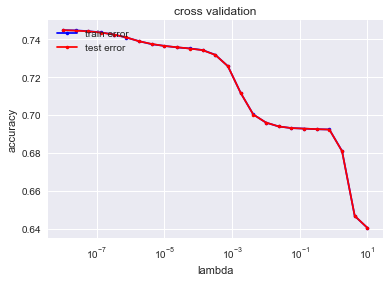

0 1e-08
1 2.37137370566e-08
2 5.6234132519e-08
3 1.33352143216e-07
4 3.16227766017e-07
5 7.49894209332e-07
6 1.77827941004e-06
7 4.21696503429e-06
8 1e-05
9 2.37137370566e-05
10 5.6234132519e-05
11 0.000133352143216
12 0.000316227766017
13 0.000749894209332
14 0.00177827941004
15 0.00421696503429
16 0.01
17 0.0237137370566
18 0.056234132519
19 0.133352143216
20 0.316227766017
21 0.749894209332
22 1.77827941004
23 4.21696503429
24 10.0


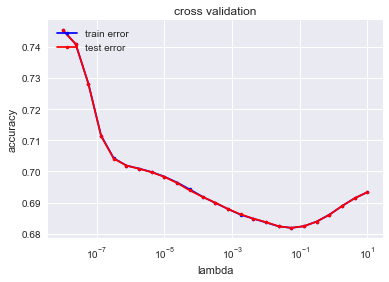

0 1e-08
1 2.37137370566e-08
2 5.6234132519e-08
3 1.33352143216e-07
4 3.16227766017e-07
5 7.49894209332e-07
6 1.77827941004e-06
7 4.21696503429e-06
8 1e-05
9 2.37137370566e-05
10 5.6234132519e-05
11 0.000133352143216
12 0.000316227766017
13 0.000749894209332
14 0.00177827941004
15 0.00421696503429
16 0.01
17 0.0237137370566
18 0.056234132519
19 0.133352143216
20 0.316227766017
21 0.749894209332
22 1.77827941004
23 4.21696503429
24 10.0


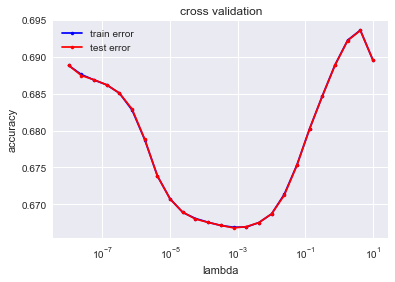

0 1e-08
1 2.37137370566e-08
2 5.6234132519e-08
3 1.33352143216e-07
4 3.16227766017e-07
5 7.49894209332e-07
6 1.77827941004e-06
7 4.21696503429e-06
8 1e-05
9 2.37137370566e-05
10 5.6234132519e-05
11 0.000133352143216
12 0.000316227766017
13 0.000749894209332
14 0.00177827941004
15 0.00421696503429
16 0.01
17 0.0237137370566
18 0.056234132519
19 0.133352143216
20 0.316227766017
21 0.749894209332
22 1.77827941004
23 4.21696503429
24 10.0


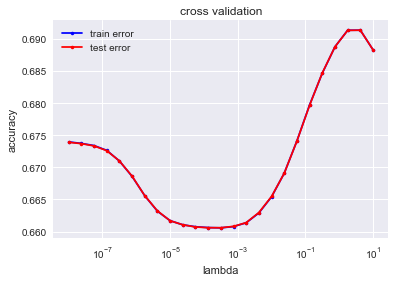

In [32]:
for i in range(1,5):
    cross_validation_demo(traindata, targets, i)

# Evaluate Training Error

In [97]:
def accuracy(weights, features, targets, nr_traindata):
    train_predictions = predict_labels(weights, features)
    return 1-(nr_traindata-train_predictions.dot(targets))/(2*nr_traindata)

(array([ 246397.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,    3603.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

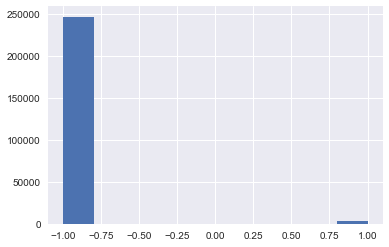

In [98]:
plt.hist(train_predictions)

As the evaluation metric, we use simple classification accuracy (percentage of correct predictions). 

In [102]:
# Good predictions after multiplication will have positive value
measure = train_predictions*targets
num_of_good_predictions = measure[measure > 0].sum()
accuracy = num_of_good_predictions/nr_traindata
print(accuracy)

0.666344


# Create Submission File

In [ ]:
test_targets, test_data, test_ids = load_csv_data("../data/test.csv",False)
nr_testdata, nr_testcolumns = test_data.shape
test_features = white_cubic_features(test_data,nr_testcolumns,nr_testdata)
test_predictions = predict_labels(weights, test_features)
create_csv_submission(test_ids, test_predictions, "Kozak_Nurmi_Tsai")